In [1]:
!pip freeze > requirements.txt


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
benefit_csv=pd.read_csv(r"/content/sample_data/benefits-and-cost-sharing-puf.csv")
benefit_csv.head(10)

<ipython-input-3-994df7e528c6>:1: DtypeWarning: Columns (9,12,19) have mixed types. Specify dtype option on import or set low_memory=False.
  benefit_csv=pd.read_csv(r"/content/sample_data/benefits-and-cost-sharing-puf.csv")


,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,StandardComponentId,PlanId,BenefitName,CopayInnTier1,CopayInnTier2,...,IsEHB,IsCovered,QuantLimitOnSvc,LimitQty,LimitUnit,Exclusions,Explanation,EHBVarReason,IsExclFromInnMOOP,IsExclFromOonMOOP
0,2024,AK,21989,HIOS,2023-12-08 01:02:13,21989AK0030001,21989AK0030001-00,Routine Dental Services (Adult),Not Applicable,NaN,...,NaN,Covered,Yes,1100.0,Dollars per Year,NaN,See policy for other limits,Not EHB,Yes,Yes
1,2024,AK,21989,HIOS,2023-12-08 01:02:13,21989AK0030001,21989AK0030001-00,Dental Check-Up for Children,Not Applicable,NaN,...,Yes,Covered,NaN,NaN,NaN,NaN,See policy for limits,Substantially Equal,No,No
2,2024,AK,21989,HIOS,2023-12-08 01:02:13,21989AK0030001,21989AK0030001-00,Basic Dental Care - Child,Not Applicable,NaN,...,Yes,Covered,NaN,NaN,NaN,NaN,See policy for limits,NaN,No,No
3,2024,AK,21989,HIOS,2023-12-08 01:02:13,21989AK0030001,21989AK0030001-00,Orthodontia - Child,Not Applicable,NaN,...,Yes,Covered,NaN,NaN,NaN,NaN,For medically necessary only,Substantially Equal,No,No
4,2024,AK,21989,HIOS,2023-12-08 01:02:13,21989AK0030001,21989AK0030001-00,Major Dental Care - Child,Not Applicable,NaN,...,Yes,Covered,NaN,NaN,NaN,NaN,See policy for limits,NaN,No,No
5,2024,AK,21989,HIOS,2023-12-08 01:02:13,21989AK0030001,21989AK0030001-00,Basic Dental Care - Adult,Not Applicable,NaN,...,NaN,Covered,Yes,1100.0,Dollars per Year,NaN,See policy for other limits,Not EHB,Yes,Yes
6,2024,AK,21989,HIOS,2023-12-08 01:02:13,21989AK0030001,21989AK0030001-00,Orthodontia - Adult,NaN,NaN,...,NaN,Not Covered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2024,AK,21989,HIOS,2023-12-08 01:02:13,21989AK0030001,21989AK0030001-00,Major Dental Care - Adult,Not Applicable,NaN,...,NaN,Covered,Yes,1100.0,Dollars per Year,NaN,See policy for other limits,Not EHB,Yes,Yes
8,2024,AK,21989,HIOS,2023-12-08 01:02:13,21989AK0030001,21989AK0030001-00,Accidental Dental,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024,AK,21989,HIOS,2023-12-08 01:02:13,21989AK0030001,21989AK0030001-01,Routine Dental Services (Adult),Not Applicable,NaN,...,NaN,Covered,Yes,1100.0,Dollars per Year,NaN,See policy for other limits,Not EHB,Yes,Yes


In [4]:

# Create a dictionary to store data type information for each column
data_dictionary = {}

# Iterate through each column in the DataFrame
for col in benefit_csv.columns:
    data_dictionary[col] = {
        'data_type': benefit_csv[col].dtype,
        'n_unique': benefit_csv[col].nunique(),
        'unique_values': benefit_csv[col].unique().tolist()  # Convert unique values to a list
    }

# Print the data dictionary (optional, for demonstration purposes)
# You can further process or save the data dictionary as needed
for col, info in data_dictionary.items():
  print(f"Column: {col}")
  print(f"  Data Type: {info['data_type']}")
  print(f"  Number of Unique Values: {info['n_unique']}")
  print(f"  Unique Values (first 10): {info['unique_values'][:10]}") #Print first 10 values
  print("-" * 20)

Column: BusinessYear
  Data Type: int64
  Number of Unique Values: 1
  Unique Values (first 10): [2024]
--------------------
Column: StateCode
  Data Type: object
  Number of Unique Values: 32
  Unique Values (first 10): ['AK', 'AL', 'AZ', 'FL', 'IN', 'LA', 'MO', 'MS', 'NC', 'ND']
--------------------
Column: IssuerId
  Data Type: int64
  Number of Unique Values: 424
  Unique Values (first 10): [21989, 38344, 73836, 74819, 12538, 17540, 18239, 28725, 44580, 46363]
--------------------
Column: SourceName
  Data Type: object
  Number of Unique Values: 2
  Unique Values (first 10): ['HIOS', 'SERFF']
--------------------
Column: ImportDate
  Data Type: object
  Number of Unique Values: 100
  Unique Values (first 10): ['2023-12-08 01:02:13', '2023-09-21 01:01:38', '2023-12-19 01:01:03', '2023-12-09 01:02:08', '2023-08-12 01:01:14', '2023-09-09 01:01:59', '2024-03-07 01:01:23', '2023-06-07 01:01:13', '2023-09-19 07:42:13', '2023-12-16 01:02:09']
--------------------
Column: StandardComponent

# Data Exploration

In [5]:
benefit_csv.columns

Index(['BusinessYear', 'StateCode', 'IssuerId', 'SourceName', 'ImportDate',
       'StandardComponentId', 'PlanId', 'BenefitName', 'CopayInnTier1',
       'CopayInnTier2', 'CopayOutofNet', 'CoinsInnTier1', 'CoinsInnTier2',
       'CoinsOutofNet', 'IsEHB', 'IsCovered', 'QuantLimitOnSvc', 'LimitQty',
       'LimitUnit', 'Exclusions', 'Explanation', 'EHBVarReason',
       'IsExclFromInnMOOP', 'IsExclFromOonMOOP'],
      dtype='object')

In [6]:
benefit_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1849555 entries, 0 to 1849554
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   BusinessYear         int64  
 1   StateCode            object 
 2   IssuerId             int64  
 3   SourceName           object 
 4   ImportDate           object 
 5   StandardComponentId  object 
 6   PlanId               object 
 7   BenefitName          object 
 8   CopayInnTier1        object 
 9   CopayInnTier2        object 
 10  CopayOutofNet        object 
 11  CoinsInnTier1        object 
 12  CoinsInnTier2        object 
 13  CoinsOutofNet        object 
 14  IsEHB                object 
 15  IsCovered            object 
 16  QuantLimitOnSvc      object 
 17  LimitQty             float64
 18  LimitUnit            object 
 19  Exclusions           object 
 20  Explanation          object 
 21  EHBVarReason         object 
 22  IsExclFromInnMOOP    object 
 23  IsExclFromOonMOOP    object 
dty

# DATA CLEANING

In [7]:
copay_clean=benefit_csv['CoinsInnTier1'].copy()
copay_clean.head(5)

,CoinsInnTier1
0,20.00%
1,15.00%
2,60.00%
3,70.00%
4,70.00%


# Funciton to covert str to numeric for CopatInnTier1 and CopayInnTier2

In [8]:
import pandas as pd

def clean_copay_data(copay_series):
    """
    Cleans a Pandas Series containing copay information.

    Args:
        copay_series: A Pandas Series containing copay data
                      (e.g., '20.00%', 'Not Applicable', etc.).

    Returns:
        A cleaned Pandas Series with numeric copay values
        (as floats between 0 and 1) and NaNs for non-applicable entries.
    """
    # 1. Convert to string to use str accessor
    copay_series = copay_series.astype(str)

    # 2. Extract numeric percentage using regex
    copay_series = copay_series.str.extract(r'(\d+\.?\d*)%')

    # 3. Convert to numeric, handling errors
    copay_series = pd.to_numeric(copay_series[0], errors='coerce')
    #4 replace with mean value
    mean_value = copay_series.mean()
    copay_series.fillna(mean_value, inplace=True)
    return copay_series

#    your data is in a Series called 'copay_clean'
copay_clean = clean_copay_data(copay_clean)
# copay_clean.head()

In [9]:

from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')
!pip freeze > requirements.txt

# import dtale
benefit_csv=pd.read_csv(r"/content/sample_data/cleaned_benefits_data.csv")
benefit_csv.head(10)
benefit_csv.columns
benefit_csv.info()
copay_clean=benefit_csv['CoinsInnTier1'].copy()
copay_clean.head(5)
copay_clean.unique()

def clean_copay_data(copay_series):
    """
    Cleans a Pandas Series containing copay information.

    Args:
        copay_series: A Pandas Series containing copay data
                      (e.g., '20.00%', 'Not Applicable', etc.).

    Returns:
        A cleaned Pandas Series with numeric copay values
        (as floats between 0 and 1) and NaNs for non-applicable entries.
    """
    # 1. Convert to string to use str accessor
    copay_series = copay_series.astype(str)

    # 2. Extract numeric percentage using regex
    copay_series = copay_series.str.extract(r'(\d+\.?\d*)%')

    # 3. Convert to numeric, handling errors
    copay_series = pd.to_numeric(copay_series[0], errors='coerce')
    #4 replace with mean value
    copay_series = copay_series.fillna(copay_series.mean())
    return copay_series

#    your data is in a Series called 'copay_clean'
copay_clean = clean_copay_data(copay_clean)
# copay_clean.head()

Mounted at /content/drive


<ipython-input-9-726d389e5022>:11: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  benefit_csv=pd.read_csv(r"/content/sample_data/cleaned_benefits_data.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 29 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   BusinessYear         1048575 non-null  int64  
 1   StateCode            1048575 non-null  object 
 2   IssuerId             1048575 non-null  int64  
 3   SourceName           1048575 non-null  object 
 4   ImportDate           1048575 non-null  object 
 5   StandardComponentId  1048575 non-null  object 
 6   PlanId               1048575 non-null  object 
 7   BenefitName          1048575 non-null  object 
 8   CopayOutofNet        808186 non-null   object 
 9   CoinsOutofNet        808186 non-null   object 
 10  IsEHB                1048575 non-null  object 
 11  IsCovered            1001972 non-null  object 
 12  QuantLimitOnSvc      1048575 non-null  object 
 13  LimitQty             146943 non-null   float64
 14  LimitUnit            146943 non-null   object 
 15

- seperating numerics and text 'CopayOutofNet'

In [10]:
import pandas as pd
import numpy as np

#    'benefit_csv' is already loaded as the DataFrame

copay_series = benefit_csv['CopayOutofNet']

# Function to separate numeric and text values
def separate_numeric_and_text(copay_series):
    """
    Separates numeric and text values in a Pandas Series.

    Args:
        copay_series: A Pandas Series containing copay data with both numbers and text.

    Returns:
        Two lists: One containing numeric values, another containing text values.
    """
    # Clean and extract numeric values (including decimals and values with $ sign)
    numeric_values = copay_series.str.extract(r'(\$?\d+(\.\d{1,2})?)')[0]

    # Remove the dollar sign and convert to numeric (ignoring errors)
    numeric_values = pd.to_numeric(numeric_values.str.replace('$', '', regex=False), errors='coerce')

    # Replace NaN with the mean of the valid numeric values
    numeric_mean = numeric_values.mean()
    numeric_values = numeric_values.fillna(numeric_mean)

    # Separate out valid numbers (drop NaN values)
    valid_numeric_values = numeric_values

    # Extract text values (anything that's not a valid number)
    text_values = copay_series[~copay_series.isin(valid_numeric_values.astype(str))]

    return valid_numeric_values, text_values

# Use the function on your copay series
numeric_values, text_values = separate_numeric_and_text(copay_series)

# Create new DataFrame with the numeric and text columns
benefit_csv['CopayOutofNetAmt'] = numeric_values
benefit_csv['CopayOutofNetText'] = text_values
# benefit_csv['CopayOutofNetAmt','CopayOutofNetText'].head(5)
# # Drop the original 'CopayOutofNet' column
# benefit_csv = benefit_csv.drop(columns=['CopayOutofNet'])

# # Print the updated DataFrame to confirm the changes
# print(benefit_csv.head())


In [11]:
#replace  CoinsInnTier1 to copay_clean
benefit_csv.drop('CoinsInnTier1',axis=1,inplace=True)
benefit_csv['CoinsInnTier1'] = copay_clean

In [12]:
benefit_csv['CoinsInnTier2'].isna().sum()  / len(benefit_csv['CoinsInnTier2'])

0.0

In [13]:
clean_co_in_2=benefit_csv['CoinsInnTier2'].copy()
cleaned_benefit_csv=clean_copay_data(clean_co_in_2)
cleaned_benefit_csv.head()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [14]:

benefit_csv.drop('CoinsInnTier2',axis=1,inplace=True)
benefit_csv['CoinsInnTier2'] = cleaned_benefit_csv

In [15]:
benefit_csv.head()

,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,StandardComponentId,PlanId,BenefitName,CopayOutofNet,CoinsOutofNet,...,CopayInnAmount_2,CopayInnText_2,MOOP,MOOP_Rank,Coverage_Rank,Cost_Rank,CopayOutofNetAmt,CopayOutofNetText,CoinsInnTier1,CoinsInnTier2
0,2024,AK,21989,HIOS,12/8/2023 1:02,21989AK0030001,21989AK0030001-00,Routine Dental Services (Adult),Not Applicable,20.00%,...,0.0,NaN,20.0,0,0,149213.5,321.818512,Not Applicable,NaN,NaN
1,2024,AK,21989,HIOS,12/8/2023 1:02,21989AK0030001,21989AK0030001-00,Dental Check-Up for Children,Not Applicable,15.00%,...,0.0,NaN,15.0,1,1,136429.0,321.818512,Not Applicable,NaN,NaN
2,2024,AK,21989,HIOS,12/8/2023 1:02,21989AK0030001,21989AK0030001-00,Basic Dental Care - Child,Not Applicable,60.00%,...,0.0,NaN,60.0,1,1,904070.0,321.818512,Not Applicable,NaN,NaN
3,2024,AK,21989,HIOS,12/8/2023 1:02,21989AK0030001,21989AK0030001-00,Orthodontia - Child,Not Applicable,70.00%,...,0.0,NaN,70.0,1,1,909770.5,321.818512,Not Applicable,NaN,NaN
4,2024,AK,21989,HIOS,12/8/2023 1:02,21989AK0030001,21989AK0030001-00,Major Dental Care - Child,Not Applicable,70.00%,...,0.0,NaN,70.0,1,1,909770.5,321.818512,Not Applicable,NaN,NaN


In [16]:

# Calculate the null percentage for all columns
null_percentages = benefit_csv.isnull().sum() * 100 / len(benefit_csv)
null_percentages

,0
BusinessYear,0.000000
StateCode,0.000000
IssuerId,0.000000
SourceName,0.000000
ImportDate,0.000000
StandardComponentId,0.000000
PlanId,0.000000
BenefitName,0.000000
CopayOutofNet,22.925303
CoinsOutofNet,22.925303


In [17]:
benefit_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   BusinessYear         1048575 non-null  int64  
 1   StateCode            1048575 non-null  object 
 2   IssuerId             1048575 non-null  int64  
 3   SourceName           1048575 non-null  object 
 4   ImportDate           1048575 non-null  object 
 5   StandardComponentId  1048575 non-null  object 
 6   PlanId               1048575 non-null  object 
 7   BenefitName          1048575 non-null  object 
 8   CopayOutofNet        808186 non-null   object 
 9   CoinsOutofNet        808186 non-null   object 
 10  IsEHB                1048575 non-null  object 
 11  IsCovered            1001972 non-null  object 
 12  QuantLimitOnSvc      1048575 non-null  object 
 13  LimitQty             146943 non-null   float64
 14  LimitUnit            146943 non-null   object 
 15

In [18]:

#    'benefit_csv' is already loaded as the DataFrame and contains columns 'CoinsInnTier1' and 'CoinsInnTier2'

# Drop the columns 'CoinsInnTier1' and 'CoinsInnTier2'
benefit_csv = benefit_csv.drop(['CoinsInnTier1', 'CoinsInnTier2'], axis=1)

# Now benefit_csv does not contain the specified columns

In [19]:
 #drop Explanation from dataset

#    'benefit_csv' is your DataFrame
benefit_csv = benefit_csv.drop('Explanation', axis=1)

In [20]:
benefit_csv = benefit_csv.drop('ImportDate', axis=1)

In [21]:
benefit_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 27 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   BusinessYear         1048575 non-null  int64  
 1   StateCode            1048575 non-null  object 
 2   IssuerId             1048575 non-null  int64  
 3   SourceName           1048575 non-null  object 
 4   StandardComponentId  1048575 non-null  object 
 5   PlanId               1048575 non-null  object 
 6   BenefitName          1048575 non-null  object 
 7   CopayOutofNet        808186 non-null   object 
 8   CoinsOutofNet        808186 non-null   object 
 9   IsEHB                1048575 non-null  object 
 10  IsCovered            1001972 non-null  object 
 11  QuantLimitOnSvc      1048575 non-null  object 
 12  LimitQty             146943 non-null   float64
 13  LimitUnit            146943 non-null   object 
 14  EHBVarReason         288929 non-null   object 
 15

# step 2 : LimitQty

In [22]:
benefit_csv['LimitQty'].head(5)

,LimitQty
0,1100.0
1,NaN
2,NaN
3,NaN
4,NaN


In [23]:
benefit_csv['LimitQty'].fillna(0)

,LimitQty
0,1100.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1048570,0.0
1048571,0.0
1048572,0.0
1048573,0.0



- not sure about "LimitQty" as 85% data is null so LimitUnit also need to drop or can we keep?



In [24]:
#  : LimitUnit  drop column from dataset

# Drop the 'LimitUnit' column
benefit_csv.drop('LimitUnit', axis=1, inplace=True)

# step 3
  - CopayInnTier1 :808186 type : object
  - CopayInnTier2 :191478  type : object

In [25]:
benefit_csv['CopayInnAmount'].unique()[0:20]

array([  0.,  30.,  60.,  15.,  45.,  25.,  55.,  18.,  10.,  40.,  50.,
       100.,  75., 250.,  80.,  20., 350.,   5., 150., 500.])

In [26]:
benefit_csv['IsEHB'].unique()

array(['No', 'Yes'], dtype=object)

In [27]:
benefit_csv['IsEHB'].replace(np.NaN,"No",inplace=True)

<ipython-input-27-b578a69484ec>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  benefit_csv['IsEHB'].replace(np.NaN,"No",inplace=True)


In [28]:
benefit_csv['IsEHB'].value_counts()

,count
IsEHB,
Yes,771523
No,277052


### IsEHB completed

In [29]:
benefit_csv['IsCovered'].unique()

array(['Covered', 'Not Covered', nan], dtype=object)

In [30]:
benefit_csv['QuantLimitOnSvc'].unique()

array(['Yes', 'No'], dtype=object)

In [31]:
benefit_csv['QuantLimitOnSvc'].value_counts()

,count
QuantLimitOnSvc,
No,901632
Yes,146943


- Source: data dictionary published
- Quantitative Limit on Service
Comments: This field is only required for covered
benefits; " blank values are equivalent to No "

In [32]:
benefit_csv['QuantLimitOnSvc'].isna().sum() / len(benefit_csv['QuantLimitOnSvc'])*100

0.0

In [33]:
benefit_csv['QuantLimitOnSvc'] = benefit_csv['QuantLimitOnSvc'].fillna("No")

In [34]:
benefit_csv['QuantLimitOnSvc'].value_counts()

,count
QuantLimitOnSvc,
No,901632
Yes,146943


In [35]:
benefit_csv.columns

Index(['BusinessYear', 'StateCode', 'IssuerId', 'SourceName',
       'StandardComponentId', 'PlanId', 'BenefitName', 'CopayOutofNet',
       'CoinsOutofNet', 'IsEHB', 'IsCovered', 'QuantLimitOnSvc', 'LimitQty',
       'EHBVarReason', 'IsExclFromInnMOOP', 'IsExclFromOonMOOP',
       'CopayInnAmount', 'CopayInnText', 'CopayInnAmount_2', 'CopayInnText_2',
       'MOOP', 'MOOP_Rank', 'Coverage_Rank', 'Cost_Rank', 'CopayOutofNetAmt',
       'CopayOutofNetText'],
      dtype='object')

- below code is for uncleaned dataset  , No need to run everytime, The error is beacuse , the dataset is cleaned dataset
- The Null values represent NO for the services.


In [36]:
benefit_csv['CopayInnAmount'].fillna(0,inplace=True)

<ipython-input-36-858183c492e1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  benefit_csv['CopayInnAmount'].fillna(0,inplace=True)


In [37]:
benefit_csv['CopayInnAmount'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1048575 entries, 0 to 1048574
Series name: CopayInnAmount
Non-Null Count    Dtype  
--------------    -----  
1048575 non-null  float64
dtypes: float64(1)
memory usage: 8.0 MB


In [38]:
benefit_csv['CopayInnText'].unique()

array(['Not Applicable', nan, 'Copay after deductible', 'No Charge',
       'No Charge after deductible', 'Copay per Day',
       'Copay per Day after deductible', 'Copay with deductible',
       'Copay per Stay after deductible', 'Copay per Stay',
       'Copay per Stay with deductible'], dtype=object)

- below code is for uncleaned dataset

In [39]:
benefit_csv['CopayInnAmount_2'].fillna(0,inplace=True)

<ipython-input-39-44bfdfca67c1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  benefit_csv['CopayInnAmount_2'].fillna(0,inplace=True)


In [40]:
benefit_csv['CopayInnText_2'].unique()

array([nan, 'Not Applicable', 'Copay after deductible', 'No Charge',
       'Copay per Day', 'No Charge after deductible',
       'Copay with deductible'], dtype=object)

In [41]:
#    'benefit_csv' is your DataFrame and 'BusinessYear' is the column with missing values.
benefit_csv['BusinessYear'].fillna(benefit_csv['BusinessYear'].median(), inplace=True)

<ipython-input-41-2c19c28ef382>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  benefit_csv['BusinessYear'].fillna(benefit_csv['BusinessYear'].median(), inplace=True)


In [42]:
benefit_csv['BusinessYear'].value_counts()

,count
BusinessYear,
2024,1048575


### Exploratory Data Analysis

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

                  BusinessYear  IssuerId  LimitQty  CopayInnAmount  \
BusinessYear               NaN       NaN       NaN             NaN   
IssuerId                   NaN  1.000000  0.009418       -0.029571   
LimitQty                   NaN  0.009418  1.000000       -0.003358   
CopayInnAmount             NaN -0.029571 -0.003358        1.000000   
CopayInnAmount_2           NaN -0.037254 -0.002862        0.056637   
MOOP                       NaN -0.010670  0.011762        0.050592   
MOOP_Rank                  NaN -0.174896 -0.012203        0.014284   
Coverage_Rank              NaN -0.036938 -0.077514        0.095296   
Cost_Rank                  NaN -0.021007  0.001729        0.306089   
CopayOutofNetAmt           NaN -0.001811 -0.018442        0.251558   

                  CopayInnAmount_2      MOOP  MOOP_Rank  Coverage_Rank  \
BusinessYear                   NaN       NaN        NaN            NaN   
IssuerId                 -0.037254 -0.010670  -0.174896      -0.036938   
LimitQt

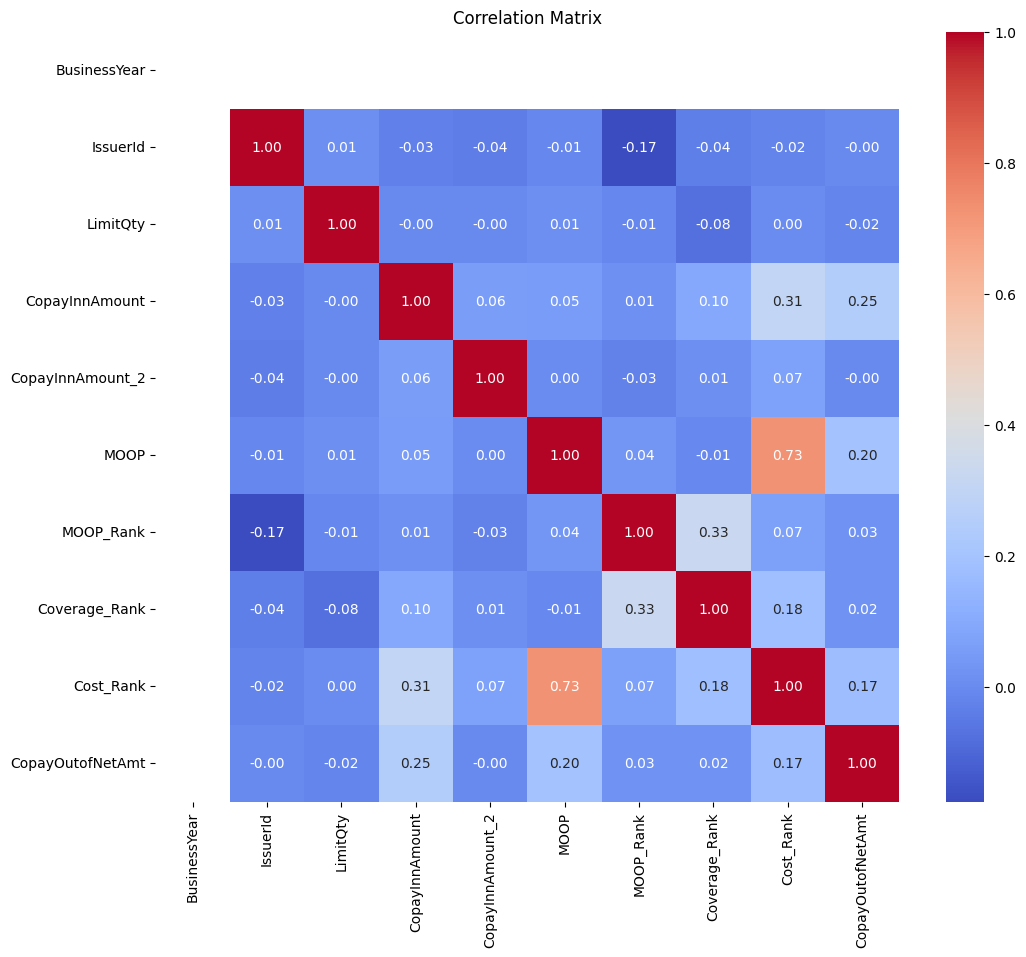

In [44]:
#  : create a correlation matrix

#    'benefit_csv' is your DataFrame and you want to create a correlation matrix for numerical columns.
numerical_cols = benefit_csv.select_dtypes(include=np.number).columns

# Calculate the correlation matrix
correlation_matrix = benefit_csv[numerical_cols].corr()

# Display the correlation matrix
print(correlation_matrix)

# You can also visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

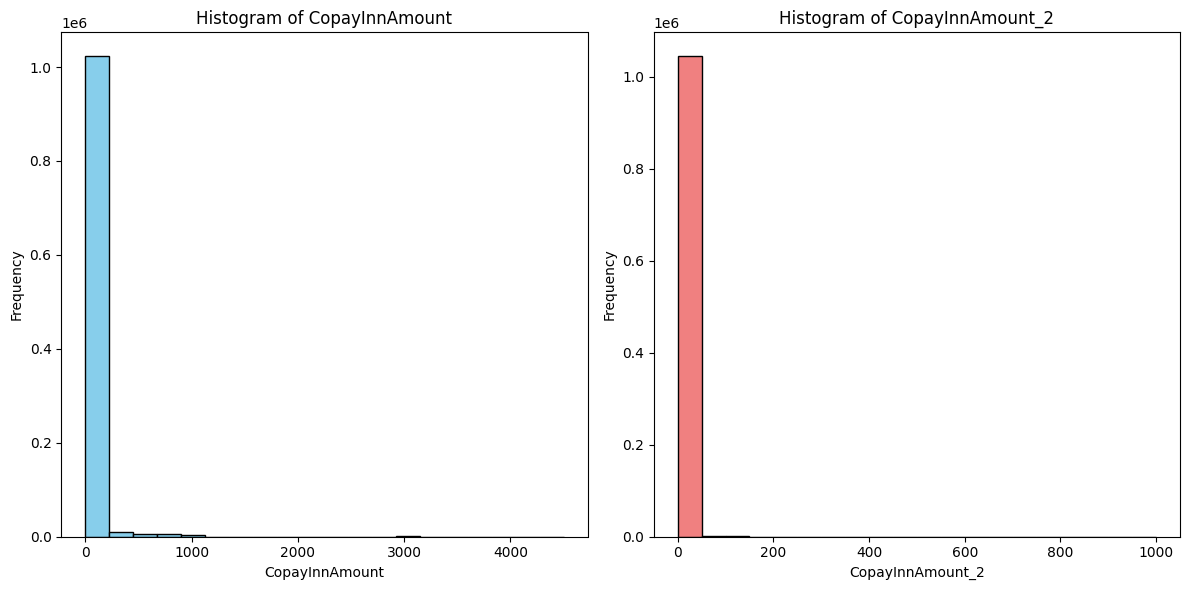

In [45]:
#  ate histogram for CopayInnAmount and CopayInnAmount_2 seperately

import matplotlib.pyplot as plt

# Create the histograms
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist(benefit_csv['CopayInnAmount'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of CopayInnAmount')
plt.xlabel('CopayInnAmount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist(benefit_csv['CopayInnAmount_2'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Histogram of CopayInnAmount_2')
plt.xlabel('CopayInnAmount_2')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

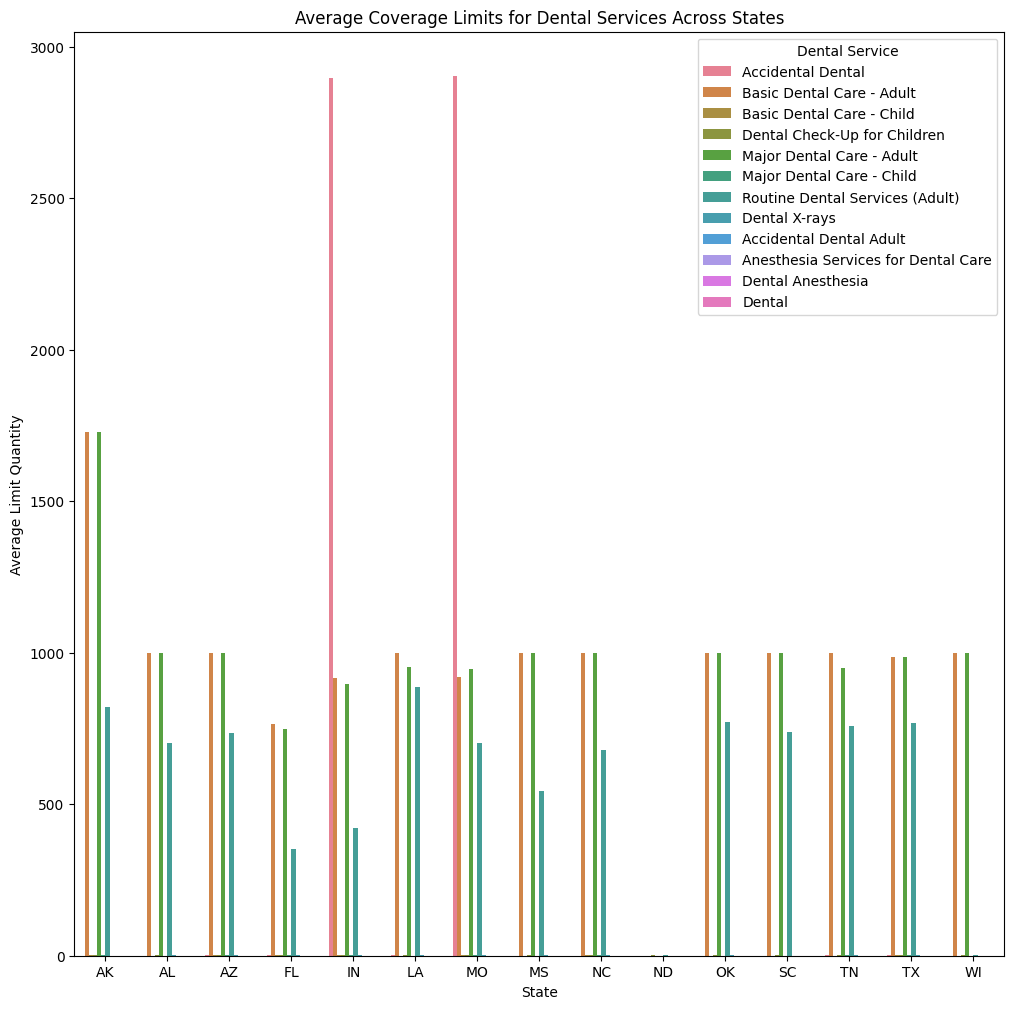

In [46]:
dental_services = benefit_csv[benefit_csv['BenefitName'].str.contains('Dental', na=False)]
dental_coverage_limits = dental_services.groupby(['StateCode', 'BenefitName'])['LimitQty'].agg(['mean', 'std', 'min', 'max'])
dental_coverage_limits.reset_index(inplace=True)

plt.figure(figsize=(12, 12))
sns.barplot(data=dental_coverage_limits, x='StateCode', y='mean', hue='BenefitName')
plt.title("Average Coverage Limits for Dental Services Across States")
plt.xlabel("State")
plt.ylabel("Average Limit Quantity")
plt.legend(title="Dental Service")
plt.show()

<ipython-input-47-26c1b566e70e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ehb_comparison, x='IsEHB', y='mean', palette="Set3")


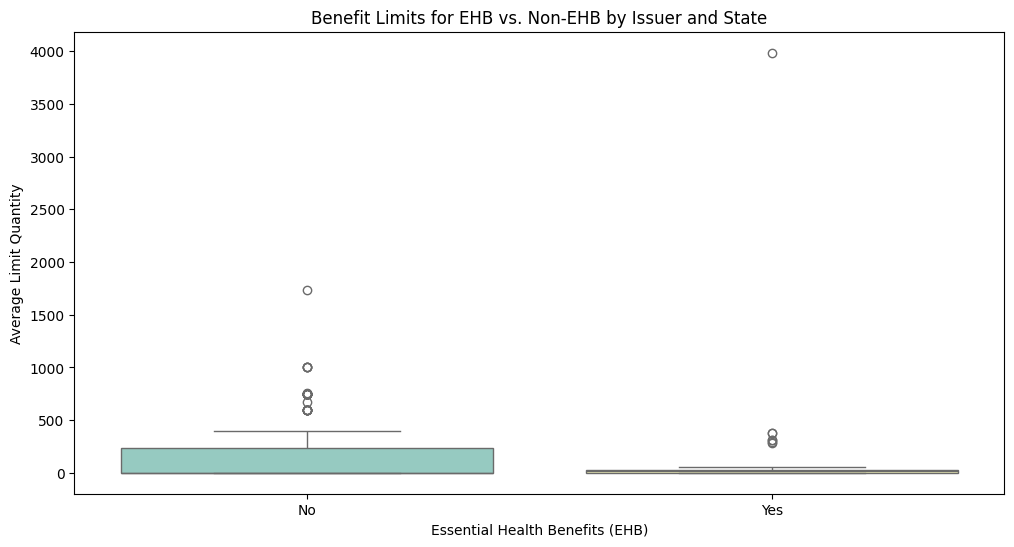

In [47]:
# 1.2 Benefit limits for EHB vs. non-EHB
ehb_comparison = benefit_csv.groupby(['IsEHB', 'StateCode', 'IssuerId'])['LimitQty'].agg(['mean', 'std', 'count']).reset_index()

plt.figure(figsize=(12, 6))
sns.boxplot(data=ehb_comparison, x='IsEHB', y='mean', palette="Set3")
plt.title("Benefit Limits for EHB vs. Non-EHB by Issuer and State")
plt.xlabel("Essential Health Benefits (EHB)")
plt.ylabel("Average Limit Quantity")
plt.show()

<Figure size 800x500 with 0 Axes>

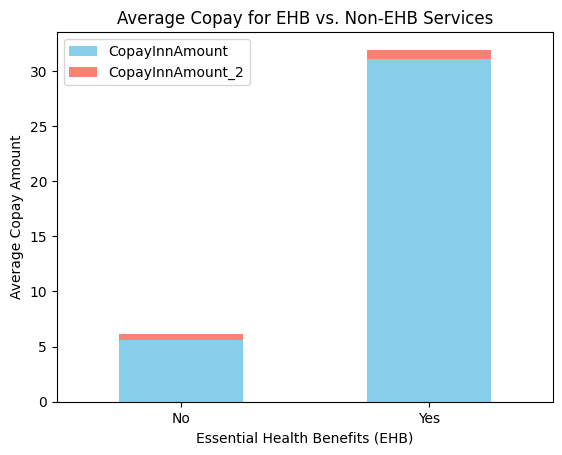

In [48]:
# 2.1 Average copay for essential vs. non-essential services
copay_avg = benefit_csv.groupby('IsEHB')[['CopayInnAmount', 'CopayInnAmount_2']].mean().reset_index()

plt.figure(figsize=(8, 5))
copay_avg.plot(kind='bar', x='IsEHB', stacked=True, color=['skyblue', 'salmon'])
plt.title("Average Copay for EHB vs. Non-EHB Services")
plt.xlabel("Essential Health Benefits (EHB)")
plt.ylabel("Average Copay Amount")
plt.xticks(rotation=0)
plt.show()

<Figure size 1400x700 with 0 Axes>

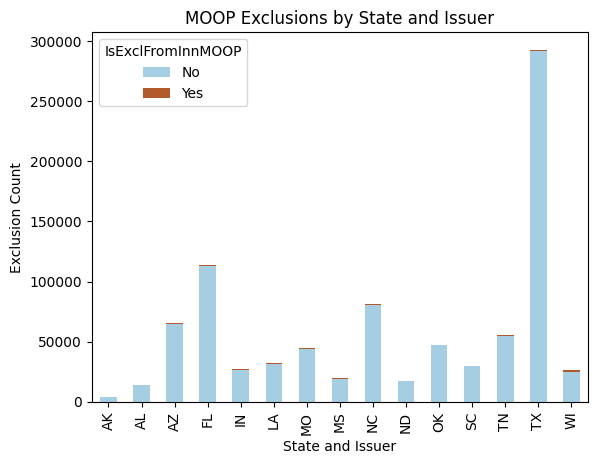

In [49]:
# 2.3 Variations in copayment and out-of-pocket exclusions by state and issuer
moop_exclusions = benefit_csv.groupby(['StateCode'])[['IsExclFromInnMOOP']].value_counts().unstack().fillna(0)

plt.figure(figsize=(14, 7))
moop_exclusions.plot(kind='bar', stacked=True, colormap='Paired')
plt.title("MOOP Exclusions by State and Issuer")
plt.xlabel("State and Issuer")
plt.ylabel("Exclusion Count")
plt.xticks(rotation=90)
plt.show()

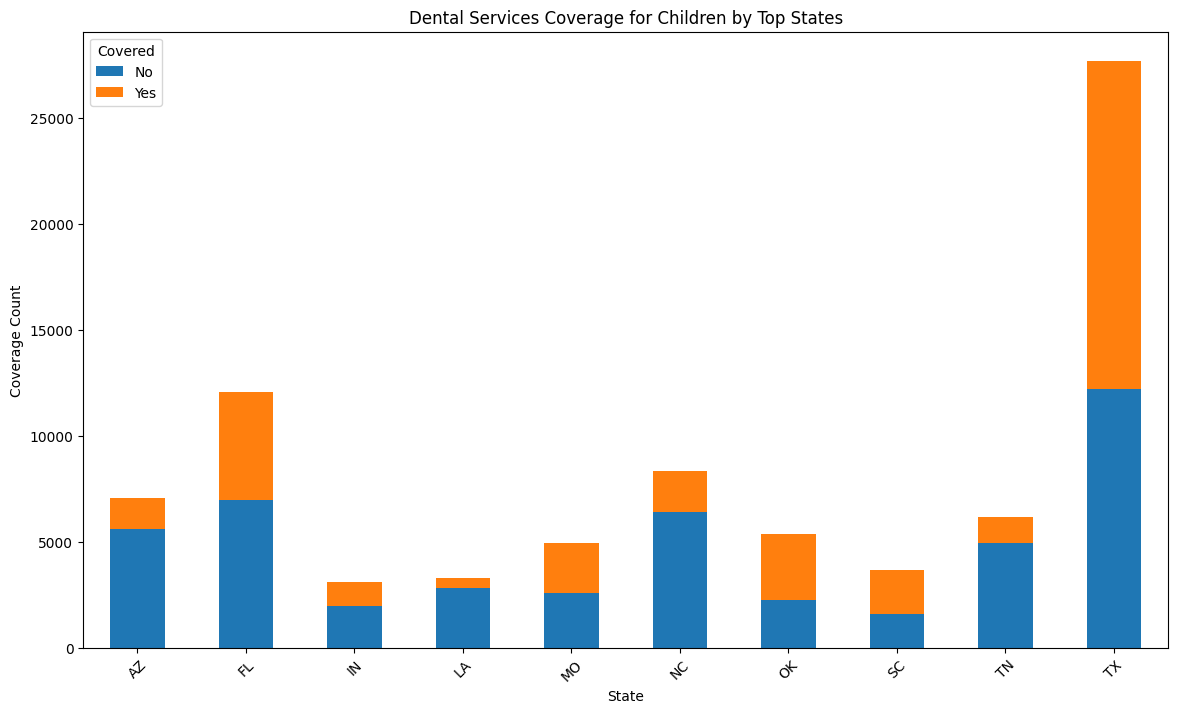

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and filter the dataset as per your original code
#    benefit_csv is your DataFrame
child_services = benefit_csv[benefit_csv['BenefitName'].str.contains('Child', na=False)]

# Get top 10 states with the highest count for simplification
top_states = child_services['StateCode'].value_counts().nlargest(10).index
filtered_data = child_services[child_services['StateCode'].isin(top_states)]

# Group by State and Coverage, then unstack and plot
child_coverage = filtered_data.groupby(['StateCode', 'IsCovered']).size().unstack().fillna(0)

# Plotting
child_coverage.plot(kind='bar', stacked=True, figsize=(14, 8), color=['#1f77b4', '#ff7f0e'])
plt.title("Dental Services Coverage for Children by Top States")
plt.xlabel("State")
plt.ylabel("Coverage Count")
plt.legend(title="Covered", labels=["No", "Yes"])
plt.xticks(rotation=45)
plt.show()


### Metrics for best Insurance

In [51]:
benefit_csv.columns

Index(['BusinessYear', 'StateCode', 'IssuerId', 'SourceName',
       'StandardComponentId', 'PlanId', 'BenefitName', 'CopayOutofNet',
       'CoinsOutofNet', 'IsEHB', 'IsCovered', 'QuantLimitOnSvc', 'LimitQty',
       'EHBVarReason', 'IsExclFromInnMOOP', 'IsExclFromOonMOOP',
       'CopayInnAmount', 'CopayInnText', 'CopayInnAmount_2', 'CopayInnText_2',
       'MOOP', 'MOOP_Rank', 'Coverage_Rank', 'Cost_Rank', 'CopayOutofNetAmt',
       'CopayOutofNetText'],
      dtype='object')

In [52]:
benefit_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   BusinessYear         1048575 non-null  int64  
 1   StateCode            1048575 non-null  object 
 2   IssuerId             1048575 non-null  int64  
 3   SourceName           1048575 non-null  object 
 4   StandardComponentId  1048575 non-null  object 
 5   PlanId               1048575 non-null  object 
 6   BenefitName          1048575 non-null  object 
 7   CopayOutofNet        808186 non-null   object 
 8   CoinsOutofNet        808186 non-null   object 
 9   IsEHB                1048575 non-null  object 
 10  IsCovered            1001972 non-null  object 
 11  QuantLimitOnSvc      1048575 non-null  object 
 12  LimitQty             146943 non-null   float64
 13  EHBVarReason         288929 non-null   object 
 14  IsExclFromInnMOOP    871459 non-null   object 
 15

# EDA- Ranks for Copay,COINN and Out-of-Pocket Expenses

In [53]:
benefit_csv['CopayOutofNet'].describe()

,CopayOutofNet
count,808186
unique,173
top,Not Applicable
freq,755415


In [54]:
benefit_csv['CopayOutofNet'].replace(np.NaN,0,inplace=True)

<ipython-input-54-022443f93c1c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  benefit_csv['CopayOutofNet'].replace(np.NaN,0,inplace=True)


In [55]:
benefit_csv['CopayOutofNet'].describe()

,CopayOutofNet
count,1048575
unique,174
top,Not Applicable
freq,755415


In [56]:
# Assign scores for out-of-pocket limits
benefit_csv['MOOPScore'] = np.where(benefit_csv['IsExclFromInnMOOP'] == 'No', 1, 0) + \
                    np.where(benefit_csv['IsExclFromOonMOOP'] == 'No', 1, 0)

# Rank plans based on MOOP exclusions (higher score is better)
benefit_csv['MOOPRank'] = benefit_csv['MOOPScore'].rank(ascending=False, method='min')


In [57]:
# Rank based on essential health benefits and coverage
# benefit_csv['Coverage_Rank'] = benefit_csv.apply(lambda row: 1 if row['IsCovered'] == "Covered" and row['IsEHB'] == "Yes" else 0, axis=1)
# Assign scores for coverage
benefit_csv['CoverageScore'] = np.where(benefit_csv['IsCovered'] == 'Covered', 1, 0) + \
                        np.where(benefit_csv['IsEHB'] == 'Yes', 1, 0)

# Rank plans based on coverage (higher score is better)
benefit_csv['CoverageRank'] = benefit_csv['CoverageScore'].rank(ascending=False, method='min')


In [58]:
benefit_csv['Coverage_Rank'].value_counts()

,count
Coverage_Rank,
1,732660
0,315915


In [59]:
#Cost Effeciency Rank
benefit_csv['CostEfficiencyScore'] = (
    benefit_csv['CopayInnAmount'] +
    benefit_csv['CopayInnAmount_2'] )

# Rank plans based on cost efficiency (lower score is better)
benefit_csv['CostEfficiencyRank'] = benefit_csv['CostEfficiencyScore'].rank(method='min')


In [60]:
# Assign weights for each component
weights = {
    'CostEfficiencyRank': 0.4,
    'CoverageRank': 0.4,
    'MOOPRank': 0.2
}

# Calculate the composite score
benefit_csv['CompositeScore'] = (
    weights['CostEfficiencyRank'] * benefit_csv['CostEfficiencyRank'] +
    weights['CoverageRank'] * benefit_csv['CoverageRank'] +
    weights['MOOPRank'] * benefit_csv['MOOPRank']
)

# Rank plans based on the composite score (lower score is better)
benefit_csv['CompositeRank'] = benefit_csv['CompositeScore'].rank(method='min')


In [61]:
# Cost Efficiency Ranking (based on copay and MOOP)
benefit_csv['Cost_Rank'] = benefit_csv[['CopayInnAmount', 'MOOP']].sum(axis=1)
benefit_csv['Cost_Rank'] = benefit_csv['Cost_Rank'].rank(ascending=True)


In [62]:
# Rank based on out-of-pocket exclusions
benefit_csv['MOOP_Rank'] = benefit_csv.apply(lambda row: 1 if row['IsExclFromInnMOOP'] == "No" and row['IsExclFromOonMOOP'] == "No" else 0, axis=1)


# Composite score

In [63]:


# Assign weights for each component
weights = {
    'CostEfficiencyRank': 0.4,
    'CoverageRank': 0.4,
    'MOOPRank': 0.2
}

# Calculate the composite score
benefit_csv['CompositeScore'] = (
    weights['CostEfficiencyRank'] * benefit_csv['CostEfficiencyRank'] +
    weights['CoverageRank'] * benefit_csv['CoverageRank'] +
    weights['MOOPRank'] * benefit_csv['MOOPRank']
)

# Rank plans based on the composite score (lower score is better)
benefit_csv['CompositeRank'] = benefit_csv['CompositeScore'].rank(method='min')


In [64]:
benefit_csv.columns

Index(['BusinessYear', 'StateCode', 'IssuerId', 'SourceName',
       'StandardComponentId', 'PlanId', 'BenefitName', 'CopayOutofNet',
       'CoinsOutofNet', 'IsEHB', 'IsCovered', 'QuantLimitOnSvc', 'LimitQty',
       'EHBVarReason', 'IsExclFromInnMOOP', 'IsExclFromOonMOOP',
       'CopayInnAmount', 'CopayInnText', 'CopayInnAmount_2', 'CopayInnText_2',
       'MOOP', 'MOOP_Rank', 'Coverage_Rank', 'Cost_Rank', 'CopayOutofNetAmt',
       'CopayOutofNetText', 'MOOPScore', 'MOOPRank', 'CoverageScore',
       'CoverageRank', 'CostEfficiencyScore', 'CostEfficiencyRank',
       'CompositeScore', 'CompositeRank'],
      dtype='object')

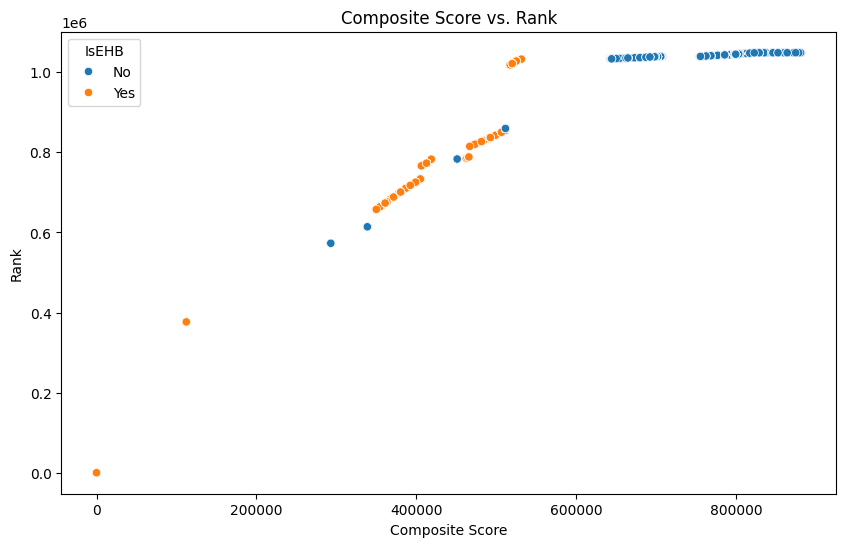

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=benefit_csv, x='CompositeScore', y='CompositeRank', hue='IsEHB')
plt.title('Composite Score vs. Rank')
plt.xlabel('Composite Score')
plt.ylabel('Rank')
plt.show()


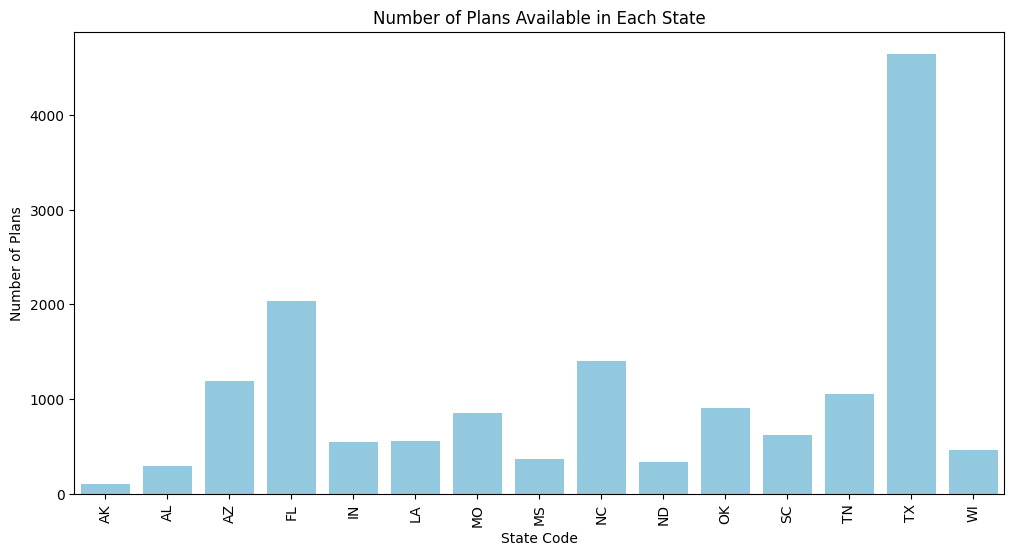

In [66]:

#    benefit_csv is your DataFrame and it contains 'StateCode' and 'PlanId' columns
# If not, replace 'benefit_csv' with your actual DataFrame name

# Group by StateCode and count the number of unique PlanId in each state
plan_counts = benefit_csv.groupby('StateCode')['PlanId'].nunique().reset_index()

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='StateCode', y='PlanId', data=plan_counts, color="skyblue")  # Use a single color for simplicity
plt.title("Number of Plans Available in Each State")
plt.xlabel("State Code")
plt.ylabel("Number of Plans")
plt.xticks(rotation=90)
plt.show()

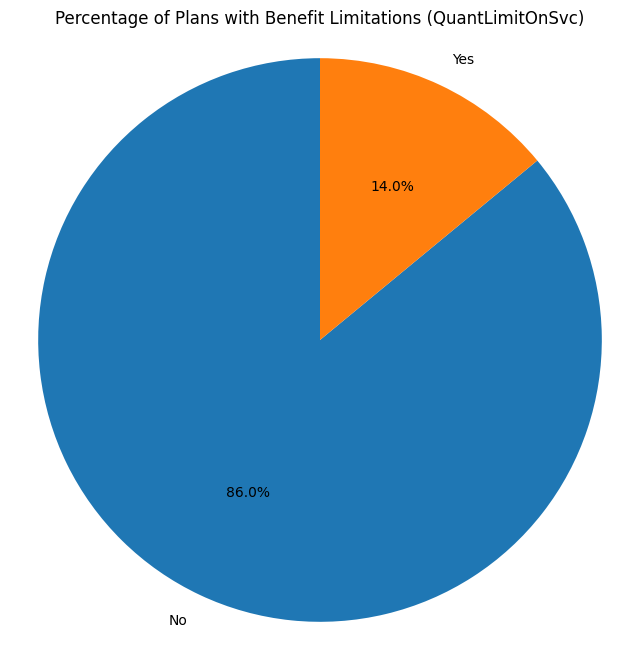

In [67]:

# Count occurrences of each unique value in 'QuantLimitOnSvc'
limit_counts = benefit_csv['QuantLimitOnSvc'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(limit_counts, labels=limit_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Plans with Benefit Limitations (QuantLimitOnSvc)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

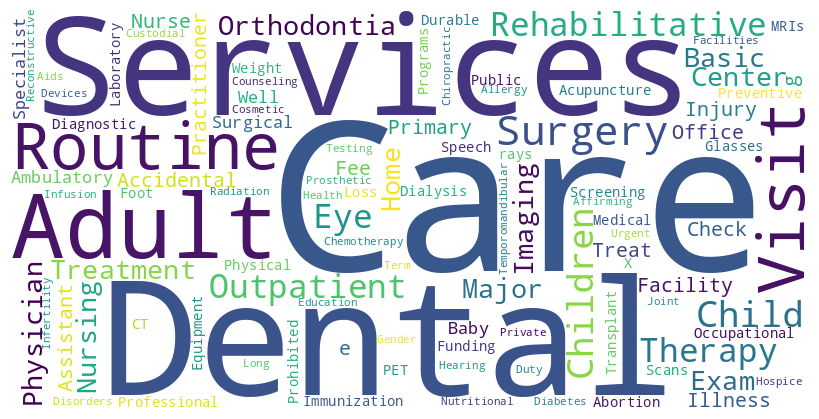

In [68]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#    'benefit_csv' DataFrame and a column named 'BenefitName' exists
# Replace with your actual DataFrame and column name if different

# Extract the top 10 most frequent services
top_services = benefit_csv['BenefitName'].value_counts().nlargest(50).index.tolist()

# Convert the list to a single string
text = ' '.join(top_services)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=STOPWORDS,
                      min_font_size=10).generate(text)

# Plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [69]:
#  : give me the top 10 StandardComponentId and benefit name

import pandas as pd

#    'benefit_csv' DataFrame is already loaded and processed as in your original code
# Replace 'benefit_csv' with your actual DataFrame name if different

# Group by 'StandardComponentId' and 'BenefitName', then count occurrences
top_components = benefit_csv.groupby(['StandardComponentId', 'BenefitName']).size().reset_index(name='count')

# Sort by count in descending order and get the top 10
top_10_components = top_components.nlargest(10, 'count')

# Display the result
top_10_components

,StandardComponentId,BenefitName,count
36,11512NC0060002,Abortion for Which Public Funding is Prohibited,7
37,11512NC0060002,Accidental Dental,7
38,11512NC0060002,Acupuncture,7
39,11512NC0060002,Allergy Testing,7
40,11512NC0060002,Bariatric Surgery,7
41,11512NC0060002,Basic Dental Care - Adult,7
42,11512NC0060002,Basic Dental Care - Child,7
43,11512NC0060002,Chemotherapy,7
44,11512NC0060002,Chiropractic Care,7
45,11512NC0060002,Cosmetic Surgery,7


- Note :  Here the 11512NC0060002 is same beacuse services are provided by one person like one insurance company

In [70]:
import pandas as pd

#    'benefit_csv' DataFrame is already loaded
# Replace 'benefit_csv' with your actual DataFrame name if different

# Function to group benefit names into broader categories
def group_benefit_names(benefit_name):
    if pd.isna(benefit_name):
        return "Unknown"  # Handle missing values
    benefit_name = str(benefit_name).lower()

    if any(term in benefit_name for term in ["primary care", "specialist visit", "urgent care", "virtual visit", "telemedicine", "routine hearing", "routine eye", "post-mastectomy"]):
        return "Medical Visits and Consultations"
    elif any(term in benefit_name for term in ["hospice", "skilled nursing", "nursing home", "home health care"]):
        return "Hospital and Inpatient Services"
    elif any(term in benefit_name for term in ["prenatal", "postnatal", "baby"]):
        return "Pregnancy and Newborn Care"
    elif any(term in benefit_name for term in ["preventive care", "screening", "mammogram", "cardiovascular"]):
        return "Preventive Care and Screenings"
    elif any(term in benefit_name for term in ["surgery", "transplant", "oral surgery", "bone marrow"]):
        return "Surgical Procedures"
    elif any(term in benefit_name for term in ["vision", "eye", "glasses"]):
        return "Vision and Eye Care"
    elif any(term in benefit_name for term in ["dental", "orthodontia", "fillings", "root canal", "dentures", "periodontal"]):
        return "Dental and Oral Care"
    elif any(term in benefit_name for term in ["mental", "behavioral", "autism", "substance abuse", "therapy"]):
        return "Mental and Behavioral Health"
    elif any(term in benefit_name for term in ["rehabilitation", "cardiac", "pulmonary", "speech therapy", "physical therapy"]):
        return "Rehabilitation and Therapy"
    elif any(term in benefit_name for term in ["nutrition", "counseling", "fitness", "weight loss"]):
        return "Nutrition and Wellness"
    elif any(term in benefit_name for term in ["diabetes", "lymphedema", "gender", "prosthetic", "orthotic"]):
        return "Chronic and Specialized Care"
    elif any(term in benefit_name for term in ["imaging", "x-rays", "diagnostic", "biomarker"]):
        return "Diagnostics and Imaging"
    elif any(term in benefit_name for term in ["tier", "prescription", "diabetes supplies", "contraceptive"]):
        return "Pharmaceuticals and Medical Supplies"
    elif any(term in benefit_name for term in ["genetic", "inherited", "pkd"]):
        return "Genetic and Rare Conditions"
    elif any(term in benefit_name for term in ["wigs", "otc card", "clinical trials", "sexual dysfunction", "habilitation"]):
        return "Special and Miscellaneous Services"
    elif "dental" in benefit_name:
        return "Dental"
    elif "vision" in benefit_name:
        return "Vision"
    elif "hospital" in benefit_name or "inpatient" in benefit_name:
      return "Hospital/Inpatient"
    elif "outpatient" in benefit_name:
      return "Outpatient"
    elif "physician" in benefit_name or "medical" in benefit_name:
        return "Physician/Medical"
    elif "mental health" in benefit_name or "behavioral health" in benefit_name:
        return "Mental/Behavioral Health"
    elif "substance use" in benefit_name:
        return "Substance Use Disorder"
    elif "prescription" in benefit_name or "drugs" in benefit_name or "pharmacy" in benefit_name:
        return "Prescription Drugs"
    elif "emergency" in benefit_name:
        return "Emergency Services"
    elif "maternity" in benefit_name:
        return "Maternity Care"
    elif "newborn" in benefit_name:
        return "Newborn Care"
    elif "child" in benefit_name:
      return "Pediatric Care"
    else:
        return "Other"

# Apply the updated function to group benefit names
benefit_csv['BenefitNameGroup'] = benefit_csv['BenefitName'].apply(group_benefit_names)

# Count the number of benefits in each group
benefit_group_counts = benefit_csv['BenefitNameGroup'].value_counts()

# Output the counts
benefit_group_counts


,count
BenefitNameGroup,
Other,166893
Dental and Oral Care,141121
Mental and Behavioral Health,126779
Surgical Procedures,89612
Medical Visits and Consultations,77899
Prescription Drugs,58488
Hospital and Inpatient Services,58396
Chronic and Specialized Care,46752
Hospital/Inpatient,43889


In [71]:
benefit_csv.columns

Index(['BusinessYear', 'StateCode', 'IssuerId', 'SourceName',
       'StandardComponentId', 'PlanId', 'BenefitName', 'CopayOutofNet',
       'CoinsOutofNet', 'IsEHB', 'IsCovered', 'QuantLimitOnSvc', 'LimitQty',
       'EHBVarReason', 'IsExclFromInnMOOP', 'IsExclFromOonMOOP',
       'CopayInnAmount', 'CopayInnText', 'CopayInnAmount_2', 'CopayInnText_2',
       'MOOP', 'MOOP_Rank', 'Coverage_Rank', 'Cost_Rank', 'CopayOutofNetAmt',
       'CopayOutofNetText', 'MOOPScore', 'MOOPRank', 'CoverageScore',
       'CoverageRank', 'CostEfficiencyScore', 'CostEfficiencyRank',
       'CompositeScore', 'CompositeRank', 'BenefitNameGroup'],
      dtype='object')

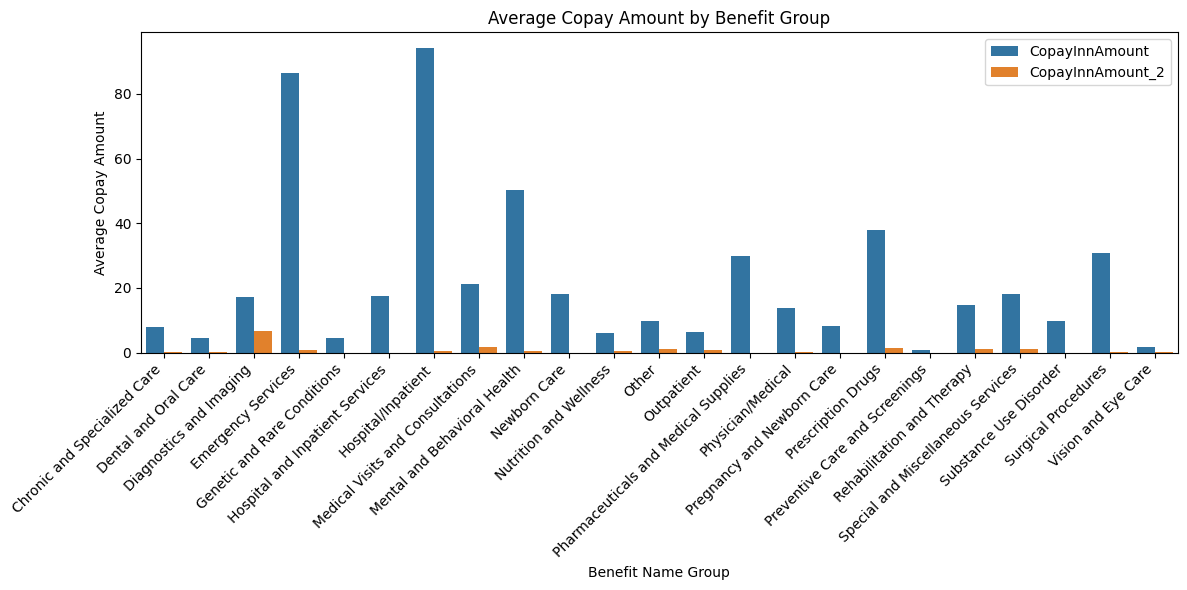

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#    benefit_csv is your DataFrame

# 1. Define the grouping for your data
# Replace with the actual columns you want to group by
grouped_data = benefit_csv.groupby('BenefitNameGroup')[['CopayInnAmount', 'CopayInnAmount_2']].mean().reset_index()

# 2. Proceed with the rest of your code
grouped_data_melted = pd.melt(grouped_data, id_vars=['BenefitNameGroup'], value_vars=['CopayInnAmount', 'CopayInnAmount_2'], var_name='CopayType', value_name='CopayAmount')


# Create the chart with the melted data
plt.figure(figsize=(12, 6))
sns.barplot(x='BenefitNameGroup', y='CopayAmount', hue='CopayType', data=grouped_data_melted)
plt.xlabel("Benefit Name Group")
plt.ylabel("Average Copay Amount")
plt.title("Average Copay Amount by Benefit Group")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

In [73]:
# Filling NaN values with the mean of the column without using inplace=True
benefit_csv['CopayInnAmount'] = benefit_csv['CopayInnAmount'].fillna(benefit_csv['CopayInnAmount'].mean())
benefit_csv['CopayInnAmount_2'] = benefit_csv['CopayInnAmount_2'].fillna(benefit_csv['CopayInnAmount_2'].mean())


In [74]:
benefit_csv[['CopayInnAmount','CopayInnAmount_2']].describe()

,CopayInnAmount,CopayInnAmount_2
count,1.048575e+06,1.048575e+06
mean,2.435174e+01,7.662313e-01
std,1.342180e+02,1.592665e+01
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,4.500000e+03,1.000000e+03


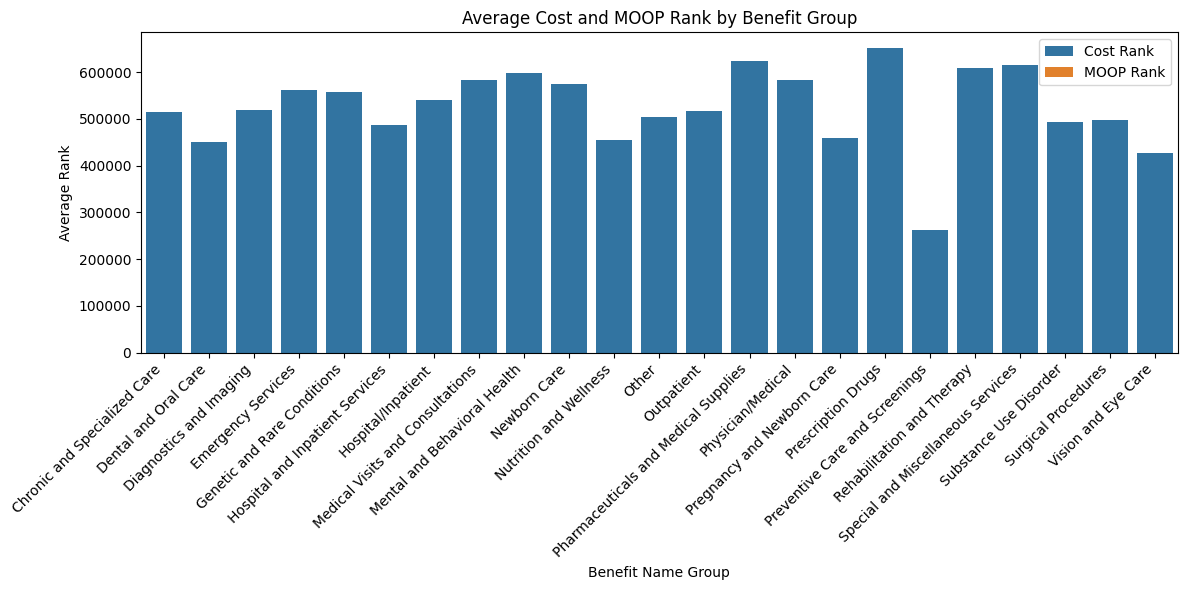

In [75]:

# Group data by 'BenefitNameGroup' and calculate the mean of 'CopayInnAmount' and 'CopayInnAmount_2'
grouped_data = benefit_csv.groupby('BenefitNameGroup').agg({'Cost_Rank': 'mean', 'MOOP_Rank': 'mean'}).reset_index()

# Create the chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='BenefitNameGroup', y='Cost_Rank', data=grouped_data, label='Cost Rank')
sns.barplot(x='BenefitNameGroup', y='MOOP_Rank', data=grouped_data, label='MOOP Rank')
plt.xlabel("Benefit Name Group")
plt.ylabel("Average Rank")
plt.title("Average Cost and MOOP Rank by Benefit Group")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()

In [76]:
# 1. Cost-Effectiveness Analysis:

# Calculate a combined cost-effectiveness score (e.g., weighted average)
benefit_csv['CostEffectiveness'] = (benefit_csv['Cost_Rank'] * 0.6) + (benefit_csv['MOOP_Rank'] * 0.4) # Adjust weights as needed
# You might consider other relevant columns and their weights for the score.

# Identify the top-performing plans based on the cost-effectiveness score:
top_plans = benefit_csv.nsmallest(10, 'CostEffectiveness')  # Get the top 10 most cost-effective plans
print("Top 10 Cost-Effective Plans:\n", top_plans)


Top 10 Cost-Effective Plans:
      BusinessYear StateCode  IssuerId SourceName StandardComponentId  \
18           2024        AK     21989       HIOS      21989AK0050001   
19           2024        AK     21989       HIOS      21989AK0050001   
27           2024        AK     21989       HIOS      21989AK0050001   
28           2024        AK     21989       HIOS      21989AK0050001   
36           2024        AK     21989       HIOS      21989AK0050002   
37           2024        AK     21989       HIOS      21989AK0050002   
45           2024        AK     21989       HIOS      21989AK0050002   
46           2024        AK     21989       HIOS      21989AK0050002   
336          2024        AK     38344       HIOS      38344AK1060001   
343          2024        AK     38344       HIOS      38344AK1060001   

                PlanId                      BenefitName   CopayOutofNet  \
18   21989AK0050001-00  Routine Dental Services (Adult)  Not Applicable   
19   21989AK0050001-00     


Average Coverage Rank by Benefit Category:
 BenefitNameGroup
Chronic and Specialized Care            0.609300
Dental and Oral Care                    0.270569
Diagnostics and Imaging                 0.999110
Emergency Services                      0.992927
Genetic and Rare Conditions             0.000000
Hospital and Inpatient Services         0.741335
Hospital/Inpatient                      0.997904
Medical Visits and Consultations        0.745363
Mental and Behavioral Health            0.905860
Newborn Care                            0.000000
Nutrition and Wellness                  0.294268
Other                                   0.527302
Outpatient                              0.873825
Pharmaceuticals and Medical Supplies    0.000000
Physician/Medical                       0.935416
Pregnancy and Newborn Care              1.000000
Prescription Drugs                      0.992699
Preventive Care and Screenings          0.990300
Rehabilitation and Therapy              0.967334
Special

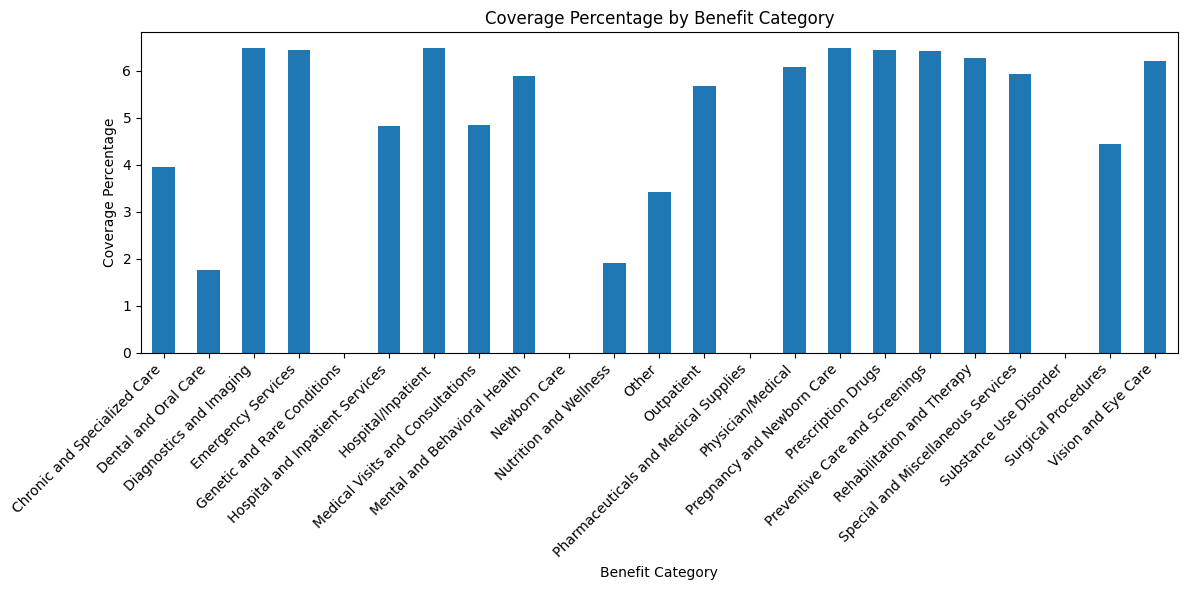

In [77]:
# 2. Coverage Analysis:
# Analyze coverage across different benefit categories (e.g., 'BenefitNameGroup'):
coverage_by_category = benefit_csv.groupby('BenefitNameGroup')['Coverage_Rank'].mean()
print("\nAverage Coverage Rank by Benefit Category:\n", coverage_by_category)

import matplotlib.pyplot as plt

# Calculate the percentage of coverage for each category
coverage_percentage = (coverage_by_category / coverage_by_category.sum()) * 100

# Create the bar chart
plt.figure(figsize=(12, 6))
coverage_percentage.plot(kind='bar')
plt.title('Coverage Percentage by Benefit Category')
plt.xlabel('Benefit Category')
plt.ylabel('Coverage Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [78]:
# 2. Coverage Analysis:

# Analyze coverage across different benefit categories (e.g., 'BenefitNameGroup'):
coverage_by_category = benefit_csv.groupby('BenefitNameGroup')['Coverage_Rank'].mean()
print("\nAverage Coverage Rank by Benefit Category:\n", coverage_by_category)



Average Coverage Rank by Benefit Category:
 BenefitNameGroup
Chronic and Specialized Care            0.609300
Dental and Oral Care                    0.270569
Diagnostics and Imaging                 0.999110
Emergency Services                      0.992927
Genetic and Rare Conditions             0.000000
Hospital and Inpatient Services         0.741335
Hospital/Inpatient                      0.997904
Medical Visits and Consultations        0.745363
Mental and Behavioral Health            0.905860
Newborn Care                            0.000000
Nutrition and Wellness                  0.294268
Other                                   0.527302
Outpatient                              0.873825
Pharmaceuticals and Medical Supplies    0.000000
Physician/Medical                       0.935416
Pregnancy and Newborn Care              1.000000
Prescription Drugs                      0.992699
Preventive Care and Screenings          0.990300
Rehabilitation and Therapy              0.967334
Special

In [79]:
# 3. State-Level Analysis:

# Compare benefit program effectiveness by state:
state_effectiveness = benefit_csv.groupby('StateCode')['CostEffectiveness'].mean()
print("\nAverage Cost-Effectiveness by State:\n", state_effectiveness)



Average Cost-Effectiveness by State:
 StateCode
AK    301591.621303
AL    287875.295184
AZ    297968.555924
FL    335083.550323
IN    307810.322042
LA    289196.462273
MO    311032.612386
MS    302584.359301
NC    336893.135344
ND    275853.368632
OK    310062.827696
SC    299175.953336
TN    325325.362176
TX    316866.885718
WI    275994.818445
Name: CostEffectiveness, dtype: float64


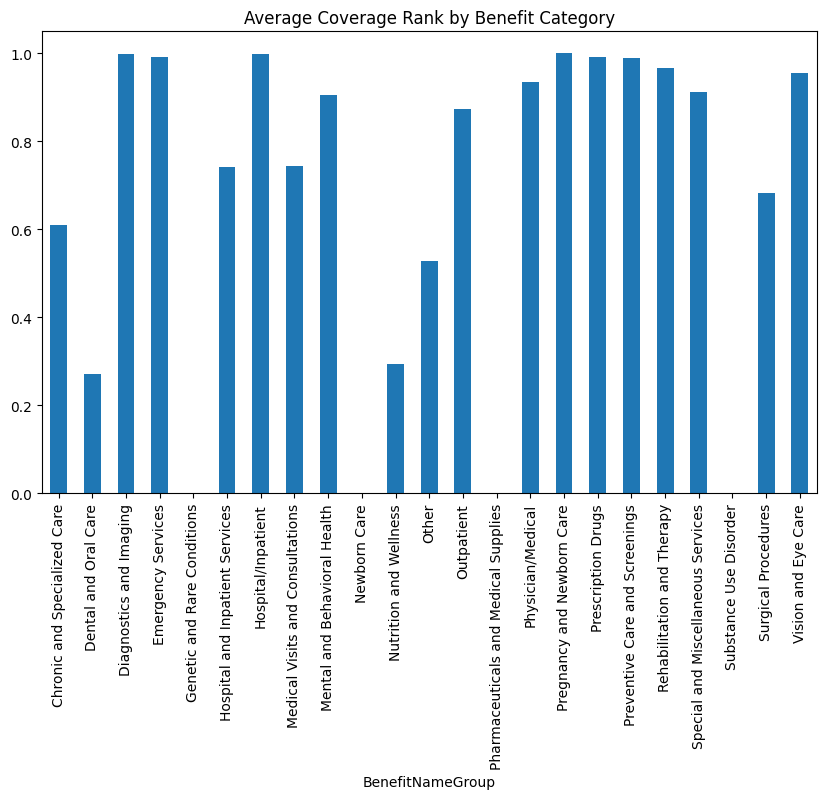

In [80]:

# Example: Bar plot of average cost-effectiveness by benefit category:
plt.figure(figsize=(10, 6))
coverage_by_category.plot(kind='bar')
plt.title('Average Coverage Rank by Benefit Category')
plt.show()

<ipython-input-81-ba2dab8408b7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='StateCode', y='Average_Cost_Rank', data=state_cost_rank, palette='viridis')


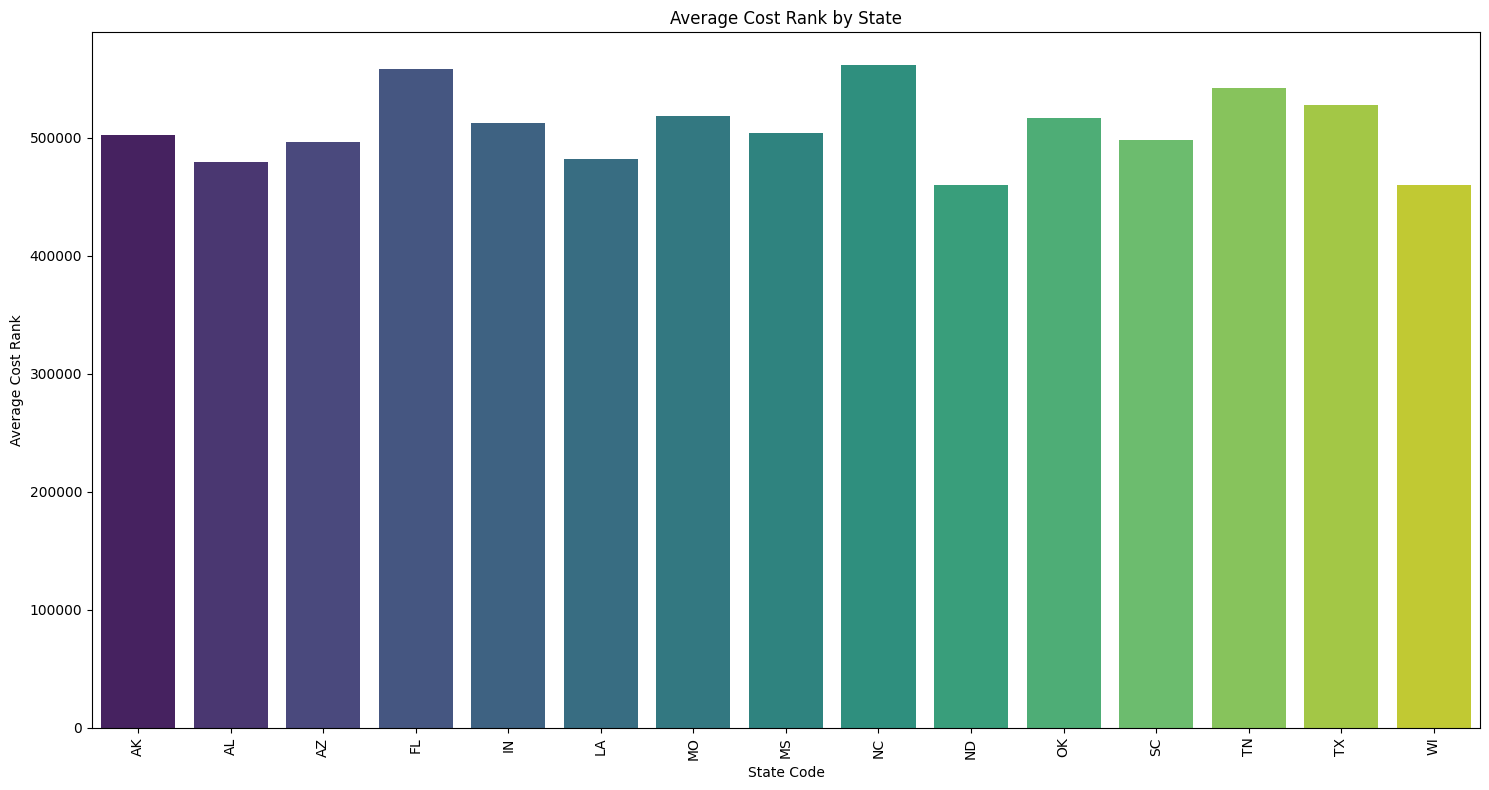

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#    'benefit_csv' is already loaded and processed

# Convert 'Cost_Rank' to numeric if it's categorical
benefit_csv['Cost_Rank'] = pd.to_numeric(benefit_csv['Cost_Rank'], errors='coerce')

# Group data by 'StateCode' and calculate the average 'Cost_Rank'
state_cost_rank = benefit_csv.groupby('StateCode')['Cost_Rank'].mean().reset_index(name='Average_Cost_Rank')

# Create the bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='StateCode', y='Average_Cost_Rank', data=state_cost_rank, palette='viridis')
plt.xlabel("State Code")
plt.ylabel("Average Cost Rank")
plt.title("Average Cost Rank by State")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<ipython-input-82-6443e191b80f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='StateCode', y='MOOP_Rank', data=state_moop_rank_sorted, palette="viridis")


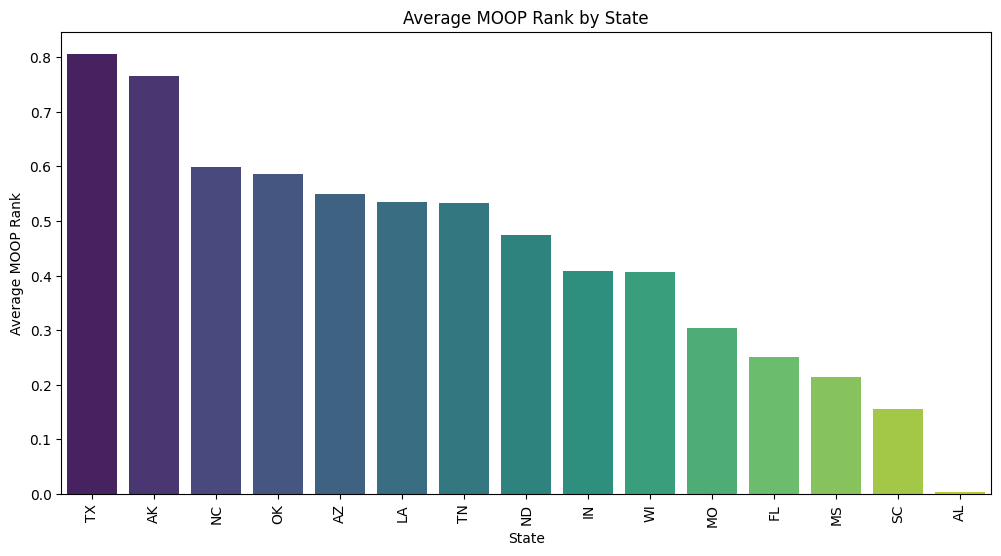

In [82]:
#  : MOOP rank by state

#    benefit_csv is your DataFrame and it contains 'StateCode' and 'MOOP_Rank' columns
# If not, replace 'benefit_csv' with your actual DataFrame name

# Group by StateCode and calculate the mean MOOP_Rank for each state
state_moop_rank = benefit_csv.groupby('StateCode')['MOOP_Rank'].mean().reset_index()

# Sort the states by mean MOOP_Rank in descending order (higher rank is better if higher is better for MOOP)
state_moop_rank_sorted = state_moop_rank.sort_values('MOOP_Rank', ascending=False) # Changed to ascending=False

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='StateCode', y='MOOP_Rank', data=state_moop_rank_sorted, palette="viridis")
plt.xlabel("State")
plt.ylabel("Average MOOP Rank")
plt.title("Average MOOP Rank by State")
plt.xticks(rotation=90)
plt.show()

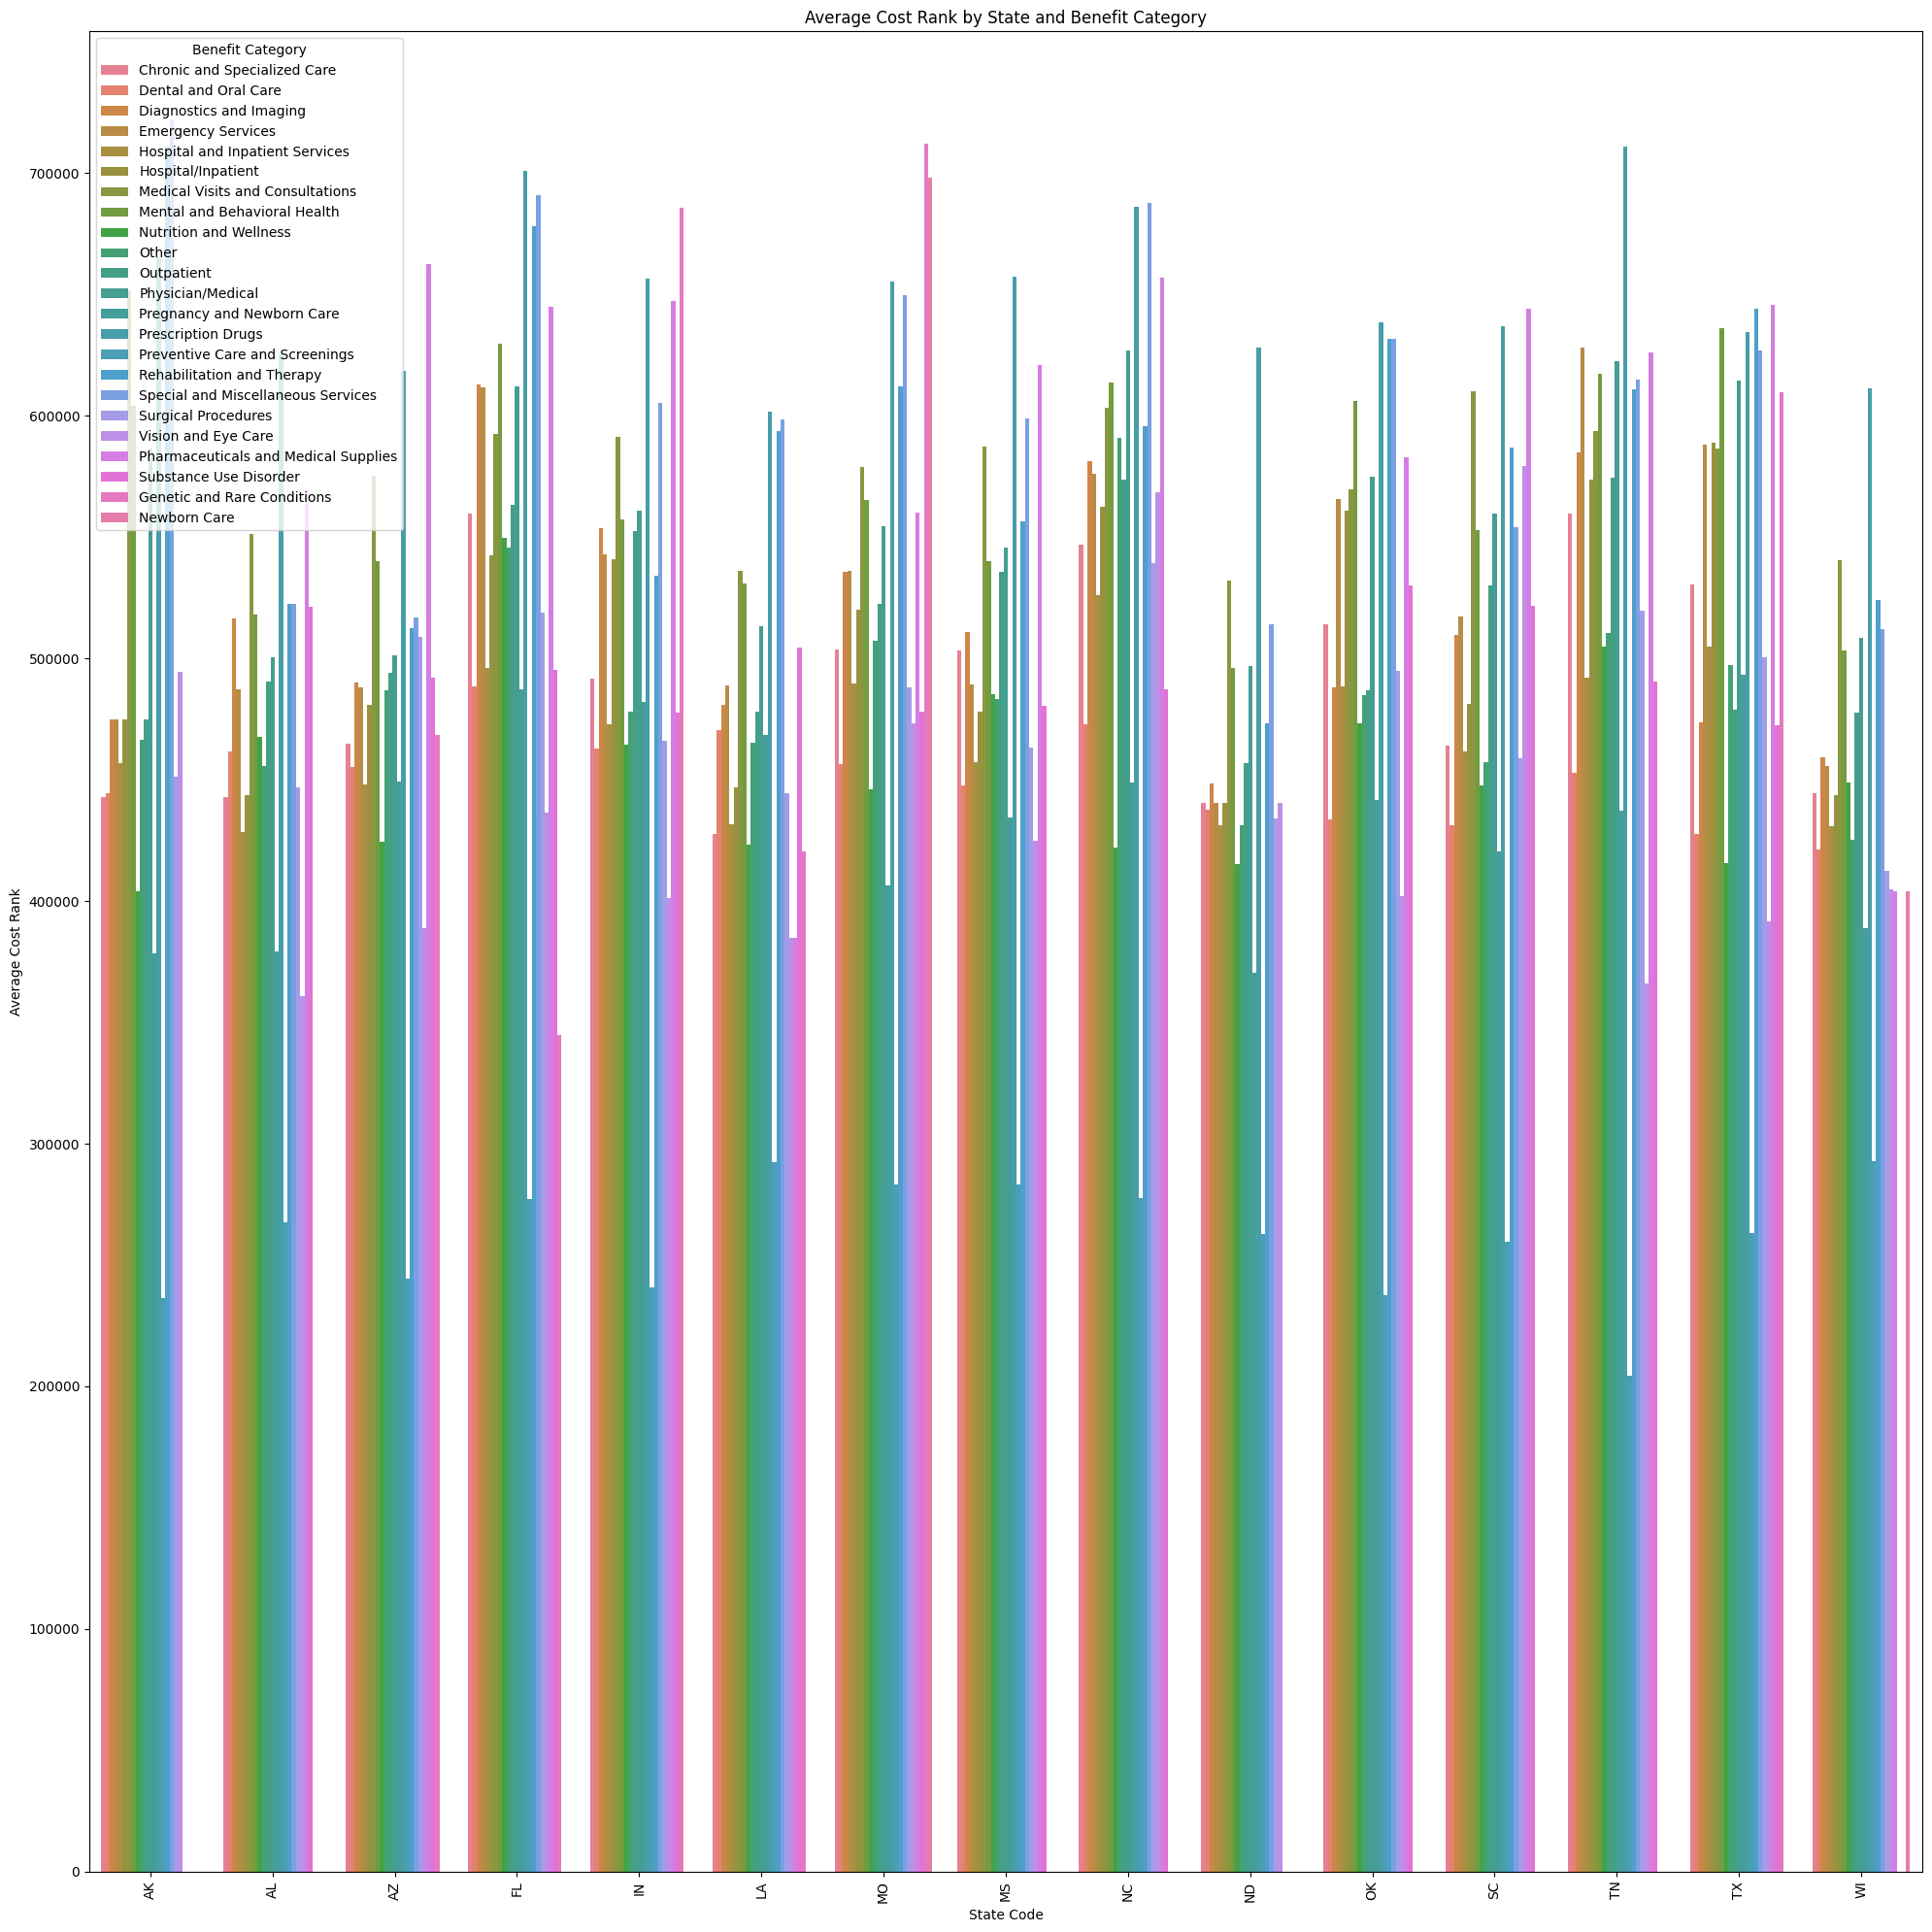

In [83]:

# Group by StateCode and BenefitNameGroup, then calculate the average Cost_Rank
state_benefit_cost = benefit_csv.groupby(['StateCode', 'BenefitNameGroup'])['Cost_Rank'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(20, 20))
sns.barplot(x='StateCode', y='Cost_Rank', hue='BenefitNameGroup', data=state_benefit_cost)
plt.xlabel("State Code")
plt.ylabel("Average Cost Rank")
plt.title("Average Cost Rank by State and Benefit Category")
plt.xticks(rotation=90)
plt.legend(title='Benefit Category')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


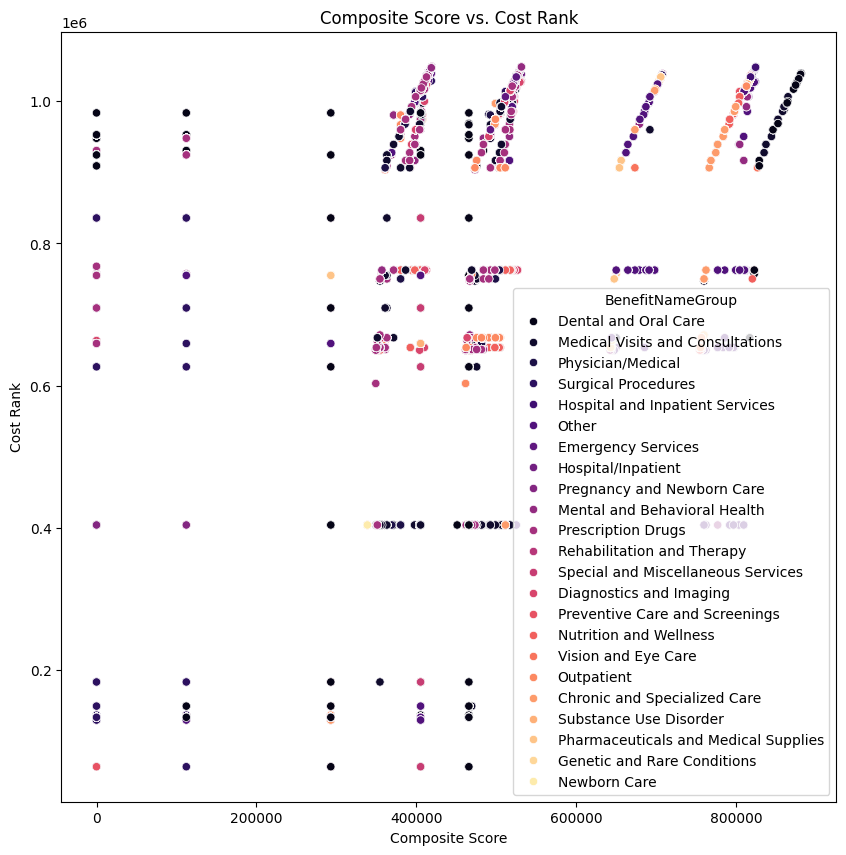

In [84]:
# Sample Scatter Plot 2: Composite Score vs. Cost Rank
plt.figure(figsize=(10, 10))
sns.scatterplot(x='CompositeScore', y='Cost_Rank', data=benefit_csv, hue='BenefitNameGroup', palette='magma')
plt.title('Composite Score vs. Cost Rank')
plt.xlabel('Composite Score')
plt.ylabel('Cost Rank')
plt.show()

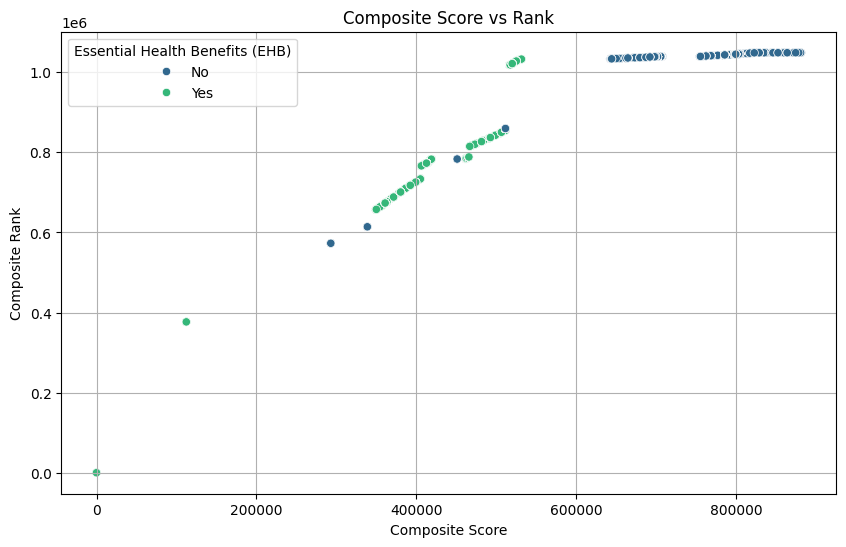

In [85]:
# Scatter Plot for Composite Score vs Rank
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=benefit_csv,
    x='CompositeScore',
    y='CompositeRank',
    hue='IsEHB',
    palette='viridis',
    edgecolor='w'
)
plt.title('Composite Score vs Rank')
plt.xlabel('Composite Score')
plt.ylabel('Composite Rank')
plt.legend(title='Essential Health Benefits (EHB)')
plt.grid(True)
plt.show()


In [86]:
benefit_csv.columns

Index(['BusinessYear', 'StateCode', 'IssuerId', 'SourceName',
       'StandardComponentId', 'PlanId', 'BenefitName', 'CopayOutofNet',
       'CoinsOutofNet', 'IsEHB', 'IsCovered', 'QuantLimitOnSvc', 'LimitQty',
       'EHBVarReason', 'IsExclFromInnMOOP', 'IsExclFromOonMOOP',
       'CopayInnAmount', 'CopayInnText', 'CopayInnAmount_2', 'CopayInnText_2',
       'MOOP', 'MOOP_Rank', 'Coverage_Rank', 'Cost_Rank', 'CopayOutofNetAmt',
       'CopayOutofNetText', 'MOOPScore', 'MOOPRank', 'CoverageScore',
       'CoverageRank', 'CostEfficiencyScore', 'CostEfficiencyRank',
       'CompositeScore', 'CompositeRank', 'BenefitNameGroup',
       'CostEffectiveness'],
      dtype='object')

<ipython-input-87-5153c7470425>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=benefit_csv, x='IsEHB', palette='pastel')


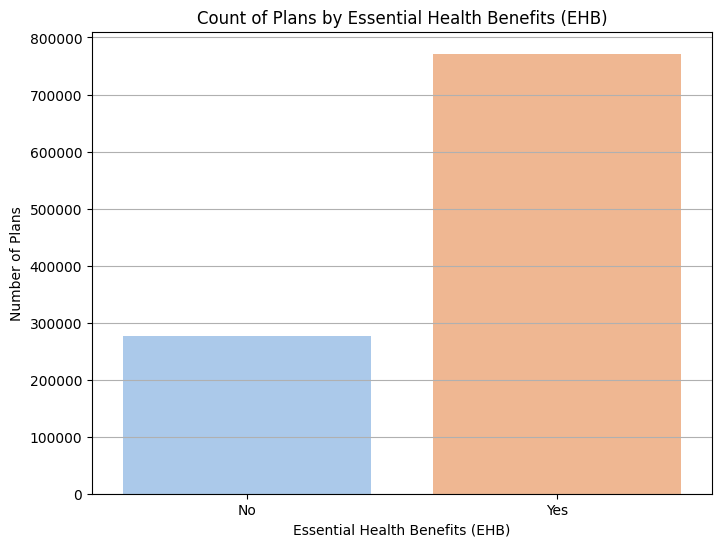

In [87]:
# Bar Chart for Plans with/without EHB
plt.figure(figsize=(8, 6))
sns.countplot(data=benefit_csv, x='IsEHB', palette='pastel')
plt.title('Count of Plans by Essential Health Benefits (EHB)')
plt.xlabel('Essential Health Benefits (EHB)')
plt.ylabel('Number of Plans')
plt.grid(axis='y')
plt.show()


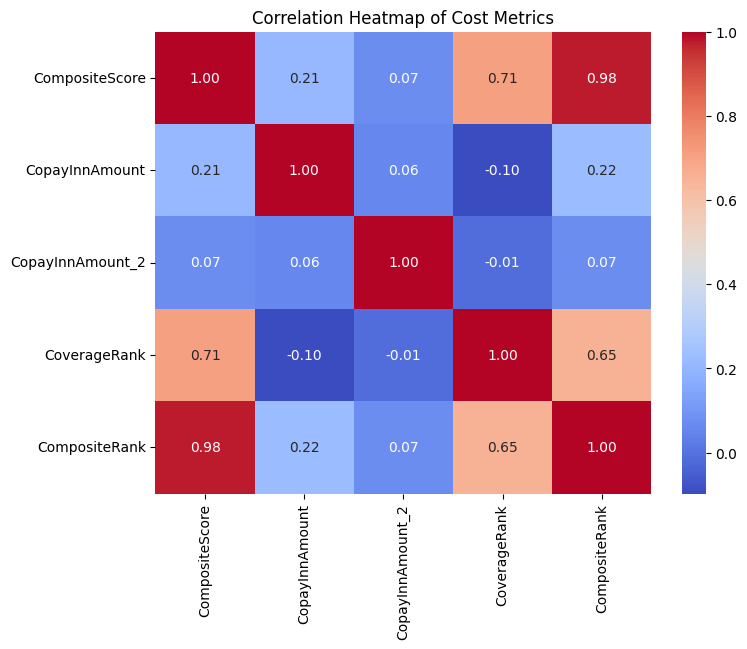

In [88]:
# Correlation Heatmap
cost_columns = ['CompositeScore', 'CopayInnAmount','CopayInnAmount_2',  'CoverageRank', 'CompositeRank']
correlation_matrix = benefit_csv[cost_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Cost Metrics')
plt.show()


In [89]:
benefit_csv.columns

Index(['BusinessYear', 'StateCode', 'IssuerId', 'SourceName',
       'StandardComponentId', 'PlanId', 'BenefitName', 'CopayOutofNet',
       'CoinsOutofNet', 'IsEHB', 'IsCovered', 'QuantLimitOnSvc', 'LimitQty',
       'EHBVarReason', 'IsExclFromInnMOOP', 'IsExclFromOonMOOP',
       'CopayInnAmount', 'CopayInnText', 'CopayInnAmount_2', 'CopayInnText_2',
       'MOOP', 'MOOP_Rank', 'Coverage_Rank', 'Cost_Rank', 'CopayOutofNetAmt',
       'CopayOutofNetText', 'MOOPScore', 'MOOPRank', 'CoverageScore',
       'CoverageRank', 'CostEfficiencyScore', 'CostEfficiencyRank',
       'CompositeScore', 'CompositeRank', 'BenefitNameGroup',
       'CostEffectiveness'],
      dtype='object')

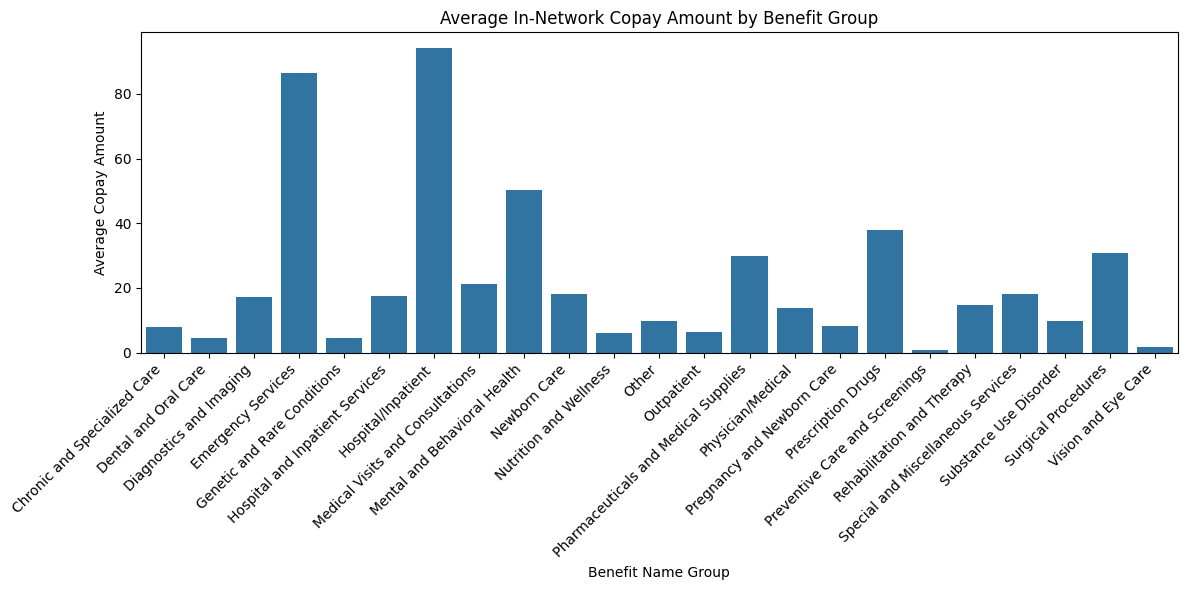

In [90]:
#  : Copayments (CopayInnText)(for services like outpatient visits, emergency visits, etc.)
# create a chart

import matplotlib.pyplot as plt
import seaborn as sns

#    'benefit_csv' is your DataFrame and it contains 'CopayInnAmount', 'BenefitNameGroup' columns
# Replace with your actual DataFrame and column names if different

# Group data by 'BenefitNameGroup' and calculate the mean of 'CopayInnAmount'
grouped_data = benefit_csv.groupby('BenefitNameGroup')['CopayInnAmount'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='BenefitNameGroup', y='CopayInnAmount', data=grouped_data)
plt.xlabel("Benefit Name Group")
plt.ylabel("Average Copay Amount")
plt.title("Average In-Network Copay Amount by Benefit Group")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [91]:
# prompt: give me the updataed csv file

import pandas as pd
# Assuming 'benefit_csv' is your DataFrame and it's already loaded and processed
# Replace with your actual DataFrame if different

# Convert the DataFrame to CSV
benefit_csv.to_csv('updated_benefit_data.csv', index=False)

# Download the updated CSV file (optional)
from google.colab import files
files.download('updated_benefit_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [96]:
updated=pd.read_csv('updated_benefit_data.csv')
updated.head(5)

<ipython-input-96-05ce1bec098c>:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  updated=pd.read_csv('updated_benefit_data.csv')


,BusinessYear,StateCode,IssuerId,SourceName,StandardComponentId,PlanId,BenefitName,CopayOutofNet,CoinsOutofNet,IsEHB,...,MOOPScore,MOOPRank,CoverageScore,CoverageRank,CostEfficiencyScore,CostEfficiencyRank,CompositeScore,CompositeRank,BenefitNameGroup,CostEffectiveness
0,2024,AK,21989,HIOS,21989AK0030001,21989AK0030001-00,Routine Dental Services (Adult),Not Applicable,20.00%,No,...,0,863727.0,1,732661.0,0.0,1.0,465810.2,788358.0,Dental and Oral Care,89529.3
1,2024,AK,21989,HIOS,21989AK0030001,21989AK0030001-00,Dental Check-Up for Children,Not Applicable,15.00%,Yes,...,2,1.0,2,1.0,0.0,1.0,1.0,1.0,Dental and Oral Care,81857.8
2,2024,AK,21989,HIOS,21989AK0030001,21989AK0030001-00,Basic Dental Care - Child,Not Applicable,60.00%,Yes,...,2,1.0,2,1.0,0.0,1.0,1.0,1.0,Dental and Oral Care,554701.0
3,2024,AK,21989,HIOS,21989AK0030001,21989AK0030001-00,Orthodontia - Child,Not Applicable,70.00%,Yes,...,2,1.0,2,1.0,0.0,1.0,1.0,1.0,Dental and Oral Care,568758.1
4,2024,AK,21989,HIOS,21989AK0030001,21989AK0030001-00,Major Dental Care - Child,Not Applicable,70.00%,Yes,...,2,1.0,2,1.0,0.0,1.0,1.0,1.0,Dental and Oral Care,568758.1


In [97]:
updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 36 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   BusinessYear         1048575 non-null  int64  
 1   StateCode            1048575 non-null  object 
 2   IssuerId             1048575 non-null  int64  
 3   SourceName           1048575 non-null  object 
 4   StandardComponentId  1048575 non-null  object 
 5   PlanId               1048575 non-null  object 
 6   BenefitName          1048575 non-null  object 
 7   CopayOutofNet        1048575 non-null  object 
 8   CoinsOutofNet        808186 non-null   object 
 9   IsEHB                1048575 non-null  object 
 10  IsCovered            1001972 non-null  object 
 11  QuantLimitOnSvc      1048575 non-null  object 
 12  LimitQty             146943 non-null   float64
 13  EHBVarReason         288929 non-null   object 
 14  IsExclFromInnMOOP    871459 non-null   object 
 15

In [98]:
# prompt: drop MOOP_Rank from updated dataset

# Drop the 'MOOP_Rank' column
updated = updated.drop('MOOP_Rank', axis=1)

# Display the updated DataFrame info
updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 35 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   BusinessYear         1048575 non-null  int64  
 1   StateCode            1048575 non-null  object 
 2   IssuerId             1048575 non-null  int64  
 3   SourceName           1048575 non-null  object 
 4   StandardComponentId  1048575 non-null  object 
 5   PlanId               1048575 non-null  object 
 6   BenefitName          1048575 non-null  object 
 7   CopayOutofNet        1048575 non-null  object 
 8   CoinsOutofNet        808186 non-null   object 
 9   IsEHB                1048575 non-null  object 
 10  IsCovered            1001972 non-null  object 
 11  QuantLimitOnSvc      1048575 non-null  object 
 12  LimitQty             146943 non-null   float64
 13  EHBVarReason         288929 non-null   object 
 14  IsExclFromInnMOOP    871459 non-null   object 
 15

In [100]:
# prompt: give me the updataed csv file

import pandas as pd
# Assuming 'benefit_csv' is your DataFrame and it's already loaded and processed
# Replace with your actual DataFrame if different

# Convert the DataFrame to CSV
benefit_csv.to_csv('updated_benefit_data-2.csv', index=False)

# Download the updated CSV file (optional)
from google.colab import files
files.download('updated_benefit_data-2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>